#ISSS 621 Data Science for Business Project Codes
## Title: Sprocket Central Bike Shop


#Load Python Packages

In [ ]:
from google.colab import files
from datetime import datetime
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import matplotlib.ticker as ticker
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import datetime as dt
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import MinMaxScaler

#Import and Manage Data

## Import Datasheets

This Section imports each datasheet in google colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
Customer_Address = pd.read_excel('/content/gdrive/MyDrive/ISS621 Project/ISS621 Project Data.xlsx' , sheet_name = 'CustomerAddress')

Customer_Address['state'] = Customer_Address['state'].replace({'New South Wales': 'NSW','Victoria': 'VIC'})

Customer_Address.head(5)


,customer_id,address,postcode,state,country
0,1,060 Morning Avenue,2016,NSW,Australia
1,2,6 Meadow Vale Court,2153,NSW,Australia
2,4,0 Holy Cross Court,4211,QLD,Australia
3,5,17979 Del Mar Point,2448,NSW,Australia
4,6,9 Oakridge Court,3216,VIC,Australia


In [ ]:
Customer_Demo = pd.read_excel('/content/gdrive/MyDrive/ISS621 Project/ISS621 Project Data.xlsx' , sheet_name = 'CustomerDemographic')

Customer_Demo.head(5)

,customer_id,first_name,last_name,gender,gender_val,past_3_years_bike_related_purchases,2017_bike_related_purchases,last_transaction_date,DOB,Age,Age Group,job_industry_category,wealth_segment,owns_car,tenure,Number of Unique Brands Bought
0,1,Laraine,Medendorp,Female,2,93,11,2017-12-23,1953-10-12,70.0,Senior,Health,Mass Customer,Yes,11.0,5.0
1,2,Eli,Bockman,Male,1,81,3,2017-08-24,1980-12-16,43.0,Adult,Financial Services,Mass Customer,Yes,16.0,2.0
2,3,Arlin,Dearle,Male,1,61,8,2017-09-19,1954-01-20,69.0,Senior,Property,Mass Customer,Yes,15.0,3.0
3,4,Talbot,NaN,Male,1,33,2,2017-06-18,1961-10-03,62.0,Senior,IT,Mass Customer,No,7.0,2.0
4,5,Sheila-kathryn,Calton,Female,2,56,6,2017-12-14,1977-05-13,46.0,Adult,NaN,Affluent Customer,Yes,8.0,5.0


In [ ]:
Customer_New = pd.read_excel('/content/gdrive/MyDrive/ISS621 Project/ISS621 Project Data.xlsx' , sheet_name = 'NewCustomerList')

Customer_New['state'] = Customer_New['state'].replace({'New South Wales': 'NSW','Victoria': 'VIC'})

Customer_New.head(5)

<ipython-input-5-affb96300ad4>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  Customer_New = pd.read_excel('/content/gdrive/MyDrive/ISS621 Project/ISS621 Project Data.xlsx' , sheet_name = 'NewCustomerList')


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,Age Group,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country
0,Chickie,Brister,Male,86,1957-07-12,66.0,Senior,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia
1,Morly,Genery,Male,69,1970-03-22,53.0,Adult,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia
2,Ardelis,Forrester,Female,10,1974-08-28,49.0,Adult,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia
3,Lucine,Stutt,Female,64,1979-01-28,44.0,Adult,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia
4,Melinda,Hadlee,Female,34,1965-09-21,58.0,Adult,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia


In [ ]:
Transactions = pd.read_excel('/content/gdrive/MyDrive/ISS621 Project/ISS621 Project Data.xlsx' , sheet_name = 'Transactions')

Transactions = Transactions.dropna(subset=['brand'])

Transactions.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,Profit,Margin,Number of Unique Brands Bought
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,110.56,0.883985,5.0
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,751.02,0.908664,5.0
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,189.28,0.123598,5.0
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,90.10,0.333333,5.0
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,0.333271,5.0


##Managing and Manipulating the Data

This section manages the datasets uploaded by merging and dropping datasets and columns for use in the next sections

In [ ]:
Full_Demo = pd.merge(Customer_Demo, Customer_Address, on = "customer_id")
Full_Demo.head(5)
Full_Demo['past_purchase_range'] = Full_Demo['past_3_years_bike_related_purchases'].apply(lambda x: "No Purchase" if x==0 else ("01-20" if x>0 and x<=20 else ("21-40" if x>20 and x<=40 else ("41-60" if x>40 and x<=60 else ("More than 60" if x>60 else "N/A")))))

In [ ]:
Full_Transaction_Demo = pd.merge(Transactions, Full_Demo, on="customer_id", how='left')
Full_Transaction_Demo.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,owns_car,tenure,Number of Unique Brands Bought_y,address,postcode,state,country,past_purchase_range
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,...,Health,Mass Customer,Yes,11.0,5.0,060 Morning Avenue,2016.0,NSW,Australia,More than 60
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,...,Health,Mass Customer,Yes,11.0,5.0,060 Morning Avenue,2016.0,NSW,Australia,More than 60
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,...,Health,Mass Customer,Yes,11.0,5.0,060 Morning Avenue,2016.0,NSW,Australia,More than 60
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Health,Mass Customer,Yes,11.0,5.0,060 Morning Avenue,2016.0,NSW,Australia,More than 60
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,...,Health,Mass Customer,Yes,11.0,5.0,060 Morning Avenue,2016.0,NSW,Australia,More than 60


#Exploratory Data Analysis

Exploratory data analysis is a procedure used in data analytics to fully comprehend the data, grasp its various characteristics—often through visual means—and look for relevant patterns within it.

For our data, We have divided the data is divided into Three parts:

1) **Full_Demo:** This data is providing the demographics of the existing customers in the system. It consists of data like age, Job industry, Address, No of purchases in last 3 years and etc.

2) **Transactions:** This data consists the details of each transaction in the year 2017.

3) **Customer_New:** This data set will be used for the recommender system of our project. It consists a set of new customers and their details.

## EDA on Existing Customer data (Full_Demo)

In [ ]:
Full_Demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 0 to 3995
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3996 non-null   int64         
 1   first_name                           3996 non-null   object        
 2   last_name                            3871 non-null   object        
 3   gender                               3996 non-null   object        
 4   gender_val                           3996 non-null   int64         
 5   past_3_years_bike_related_purchases  3996 non-null   int64         
 6   2017_bike_related_purchases          3996 non-null   int64         
 7   last_transaction_date                3489 non-null   datetime64[ns]
 8   DOB                                  3908 non-null   datetime64[ns]
 9   Age                                  3908 non-null   float64       
 10  Age Group   

In this data set, we see that we have 3996 entries and 20 columns in total. We can see that some of the columns having missing values and lets explore each and understand the meaning of it.

In [ ]:
Full_Demo.describe()

,customer_id,gender_val,past_3_years_bike_related_purchases,2017_bike_related_purchases,Age,tenure,Number of Unique Brands Bought,postcode
count,3996.000000,3996.000000,3996.000000,3996.000000,3908.000000,3909.000000,3489.000000,3996.000000
mean,2002.487988,1.553804,48.880881,4.996997,45.932702,10.655922,3.660075,2985.735485
std,1153.710903,0.539650,28.724636,2.890404,12.611533,5.658533,1.158194,844.945641
min,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000,1.000000,2000.000000
25%,1003.750000,1.000000,24.000000,3.000000,36.000000,6.000000,3.000000,2200.000000
50%,2002.500000,2.000000,48.000000,5.000000,46.000000,11.000000,4.000000,2768.000000
75%,3001.250000,2.000000,73.000000,7.000000,55.000000,15.000000,4.000000,3750.000000
max,4000.000000,3.000000,99.000000,14.000000,92.000000,22.000000,6.000000,4883.000000


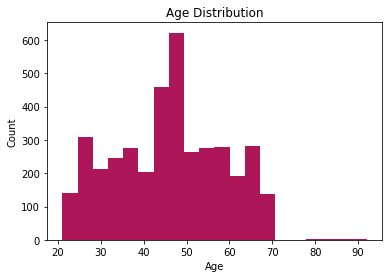

In [ ]:
plt.hist(Full_Demo['Age'], bins=20, color = "#ad1759")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

The histogram shows the distribution of ages in the dataset. The x-axis represents the age range, and the y-axis represents the number of people in the dataset that fall within that age range. We can see there is a spike between 40-50 years, more that 600 customers purchases are from this age range. The range is between 21-90 years in the data set.

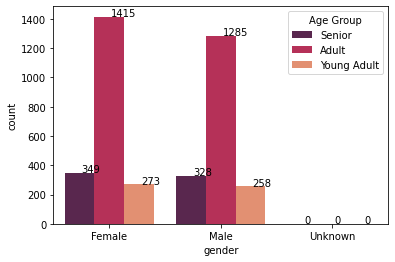

In [ ]:
ax =  sns.countplot(data=Full_Demo, x="gender", hue="Age Group", palette = "rocket")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

plt.show()

The bargraph shows the distribution of gender in the dataset. The x-axis represents the gender also with age group, and the y-axis represents the number of people in the dataset that fall within that age group. Overall we can see that the count of female in every age group is greater than male. total count of female is 2037 and male is 1871.

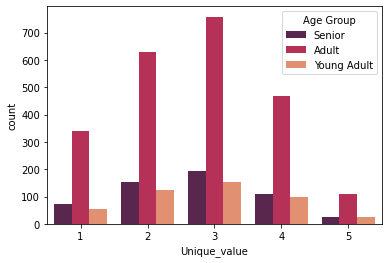

In [ ]:
df = []
df = Full_Demo
bins = [ 1, 2, 3, 4, 5, float('inf')]
labels = [1,2,3,4,5]
df['Unique_value'] = pd.cut(df['Number of Unique Brands Bought'], bins=bins, labels=labels)
sns.countplot(x = df['Unique_value'], hue=df['Age Group'], palette = "rocket")
plt.show()

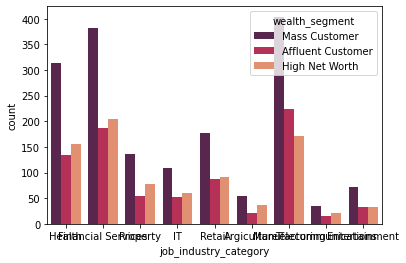

In [ ]:
sns.countplot(data=Customer_Demo, x="job_industry_category", hue="wealth_segment", palette = "rocket")
plt.show()

<Axes: xlabel='job_industry_category', ylabel='count'>

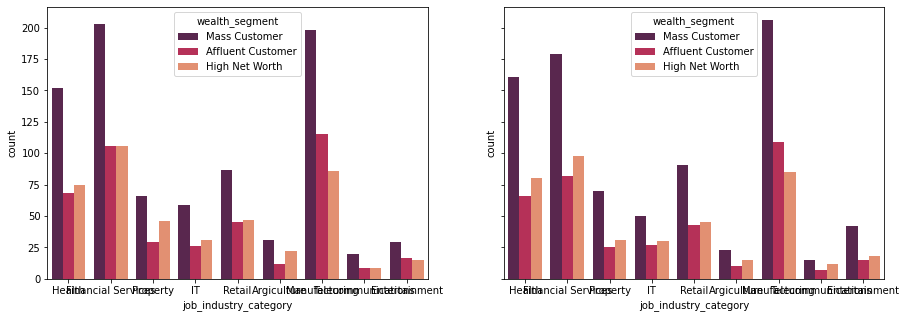

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# for ax in g.axes.flat:
#     ax.tick_params(axis='x', labelrotation=45)


sns.countplot(ax = axes[0],data=Customer_Demo[Customer_Demo['owns_car']=='Yes'], x="job_industry_category", hue="wealth_segment", palette = "rocket", order = ['Health','Financial Services', 'Property', 'IT', 'Retail', 'Argiculture',
 'Manufacturing', 'Telecommunications', 'Entertainment'])
sns.countplot(ax = axes[1],data=Customer_Demo[Customer_Demo['owns_car']=='No'], x="job_industry_category", hue="wealth_segment", palette = "rocket",order = ['Health', 'Financial Services', 'Property', 'IT', 'Retail', 'Argiculture',
 'Manufacturing', 'Telecommunications', 'Entertainment'])



# plt.show()

The bargraph shows the distribution of job industry category and wealth segment in the dataset. The x-axis represents the job industry with wealth segment, and the y-axis represents the number of people in the dataset that fall within that age group. Overall we can see that the count for Financial Services, Manufacturing and Health industries have maximum counts. The marketing team can focus on these three industries for marketing to increase sales.


<Axes: xlabel='Unique_value', ylabel='count'>

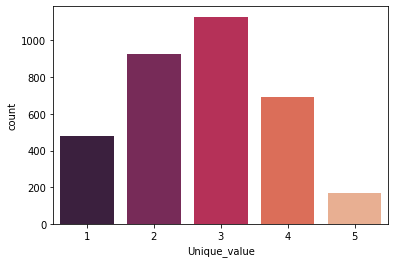

In [ ]:
df = []
df = Full_Demo
bins = [ 1, 2, 3, 4, 5, float('inf')]
labels = [1,2,3,4,5]
df['Unique_value'] = pd.cut(df['Number of Unique Brands Bought'], bins=bins, labels=labels)
sns.countplot(x = df['Unique_value'], palette = "rocket")

The above bar graph is between number of unique brands each customer orders from the list of entire transactions per customer. We can see the trend is that more than 1000 customers have ordered from 3 different brands. There are very less(less than 200) who have ordered from all 5 brands. And we also have approx 500 customers who are loyal to one brand only.


## Transaction Data EDA

In [ ]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   transaction_id                  19803 non-null  int64         
 1   product_id                      19803 non-null  int64         
 2   customer_id                     19803 non-null  int64         
 3   transaction_date                19803 non-null  datetime64[ns]
 4   online_order                    19445 non-null  float64       
 5   order_status                    19803 non-null  object        
 6   brand                           19803 non-null  object        
 7   product_line                    19803 non-null  object        
 8   product_class                   19803 non-null  object        
 9   product_size                    19803 non-null  object        
 10  list_price                      19803 non-null  float64       
 11  st

In [ ]:
Transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,Profit,Margin,Number of Unique Brands Bought
count,19803.000000,19803.000000,19803.000000,19445.000000,19803.000000,19803.000000,19803.000000,19803.000000,19803.000000
mean,9993.979650,45.815937,1739.294955,0.500849,1107.997866,556.046951,551.950915,3.162581,4.020401
std,5776.499961,30.569841,1011.946353,0.500012,582.770460,405.955660,493.412849,10.217039,1.081091
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,4.800000,0.077834,1.000000
25%,4988.500000,18.000000,858.000000,0.000000,575.270000,215.140000,133.780000,0.333285,3.000000
50%,9995.000000,45.000000,1738.000000,1.000000,1163.890000,507.580000,445.210000,0.666662,4.000000
75%,15000.500000,72.000000,2615.000000,1.000000,1635.300000,795.100000,830.240000,2.087181,5.000000
max,20000.000000,100.000000,5034.000000,1.000000,2091.470000,1759.850000,1702.550000,95.193452,6.000000


In [ ]:
#df = []
#df = Transactions
#df["Month"] = df["transaction_date"].dt.month
#df_2 = df.groupby(['Month'], as_index = False)["transaction_id"].count()
#plt.figure(figsize = (20,5))
#sns.countplot(df_2.Month, df_2.transaction_id, palette = "rocket")
#plt.ylabel("Number of Transactions ")
#plt.title("The number of transactions by months in 2017")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']);


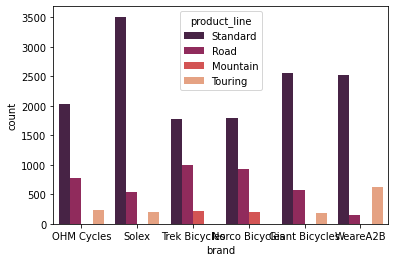

In [ ]:
sns.countplot(data=Full_Transaction_Demo, x="brand", hue="product_line", palette = "rocket")
plt.show()

The above bar graph shows different product line and grouped by brands. We can see max products for each item is from standard product line. Only Trek bicycles and Norco Bicycles sell Mountain bikes.

<Axes: xlabel='list_price', ylabel='Count'>

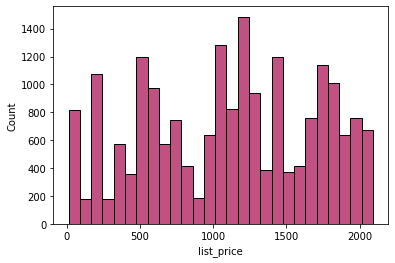

In [ ]:
sns.histplot(data=Transactions, x="list_price", color = "#ad1759")

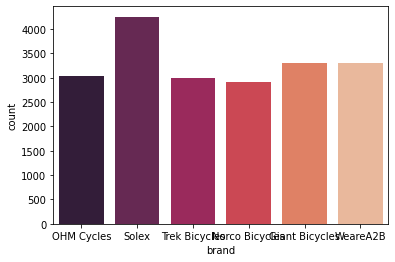

In [ ]:
sns.countplot(data=Full_Transaction_Demo, x="brand", palette = "rocket")
plt.show()

The above bar graph shows number of transactions for a particular brand. On the x axis we can see brand and y axis is the count of number of transactions for the particular brand. We can conclude from the above graph that the maximum bikes sold from Solex brand.

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


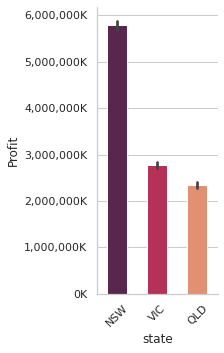

In [ ]:
sns.set(style="whitegrid")
ax = sns.catplot(x="state", y="Profit", data=Full_Transaction_Demo, estimator=sum, kind='bar', height=5, aspect=.5, palette = 'rocket', order=Full_Transaction_Demo.groupby(['state']).sum().sort_values('Profit', ascending=False).index, width=0.5)
ax.set_xticklabels(rotation=45)
ax.set(yticklabels=['{:,.0f}'.format(x) + 'K' for x in ax.facet_axis(0,0).get_yticks()])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


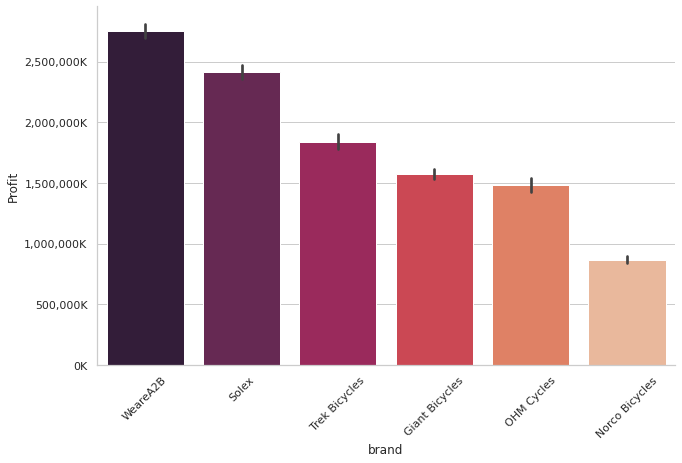

In [ ]:
ax = sns.catplot(x="brand", y="Profit", data=Transactions, estimator=sum, kind='bar', height=6, aspect=1.5, palette = 'rocket', order=Transactions.groupby(['brand']).sum().sort_values('Profit', ascending=False).index)
ax.set_xticklabels(rotation=45)
ax.set(yticklabels=['{:,.0f}'.format(x) + 'K' for x in ax.facet_axis(0,0).get_yticks()])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


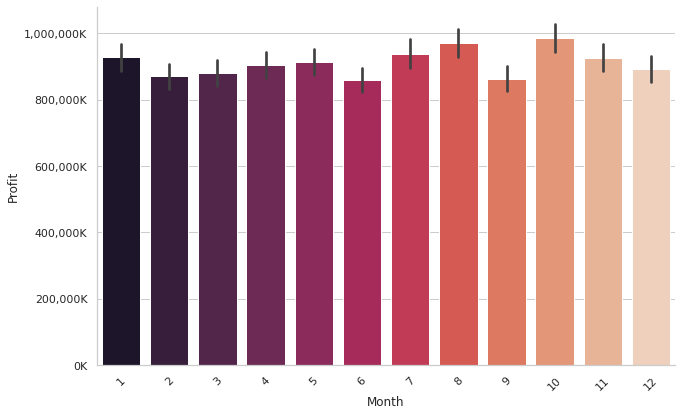

In [ ]:
df = []
df = Full_Transaction_Demo
df["Month"] = df["transaction_date"].dt.month

# Group the data by 'Month' and 'Gender' and calculate the average profit
#Avg_Profit = df.groupby(['Month', 'wealth_segment'])['Profit'].mean().reset_index()

ax = sns.catplot(x="Month", y="Profit", data=df, estimator=sum, kind='bar', height=6, aspect=1.5, palette = 'rocket')
ax.set_xticklabels(rotation=45)
ax.set(yticklabels=['{:,.0f}'.format(x) + 'K' for x in ax.facet_axis(0,0).get_yticks()])
plt.show()

In [ ]:
Customer_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   Age                                  983 non-null    float64       
 6   Age Group                            983 non-null    object        
 7   job_title                            894 non-null    object        
 8   job_industry_category                835 non-null    object        
 9   wealth_segment                       1000 non-null   object        
 10  owns_car     

#Customer Segmentation

## Customer Profiling

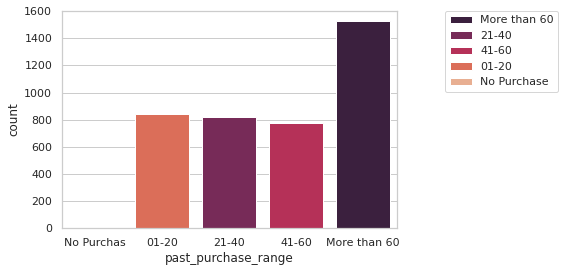

In [ ]:
#1 Past 3 Years Purchase Details
sns.countplot(x=Full_Demo['past_purchase_range'], hue= Full_Demo['past_purchase_range'], dodge=False, order = ["No Purchas","01-20","21-40","41-60","More than 60"], palette = 'rocket')
plt.legend(bbox_to_anchor=(1.5,1.025), loc='upper right')

The above graph indicates that in past 3 years a maximum of 1600 customers have more than 60 bike related purchases at Sprocket bike. The next highest number of transactions in the past 3 years is around 800 customers who purchased only 1 to 20 bikes and related accessories.
In terms of the number of past purchases, it indicates that the types of customer at Sprocket vary a lot.

     gender           brand  count
0    Female  Giant Bicycles   1647
1    Female  Norco Bicycles   1423
2    Female      OHM Cycles   1530
3    Female           Solex   2144
4    Female   Trek Bicycles   1514
5    Female        WeareA2B   1650
6      Male  Giant Bicycles   1589
7      Male  Norco Bicycles   1404
8      Male      OHM Cycles   1446
9      Male           Solex   2027
10     Male   Trek Bicycles   1400
11     Male        WeareA2B   1553
12  Unknown  Giant Bicycles     72
13  Unknown  Norco Bicycles     78
14  Unknown      OHM Cycles     63
15  Unknown           Solex     77
16  Unknown   Trek Bicycles     69
17  Unknown        WeareA2B     87


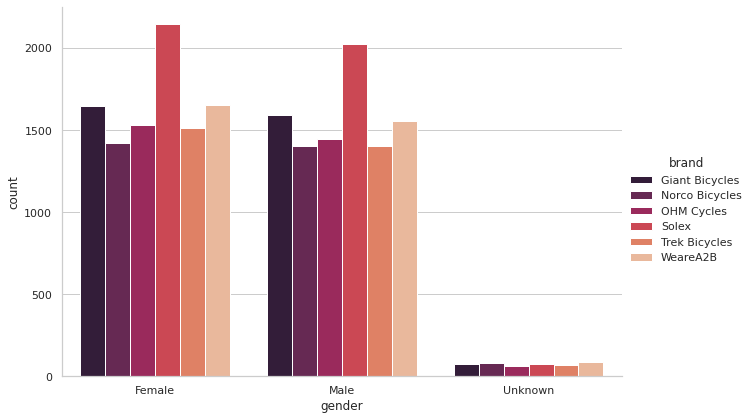

In [ ]:
#2) Group by gender/brand

# Counting the number of brands and gender combinations
grouped_gender_brand = Full_Transaction_Demo.groupby(['gender', 'brand']).size()

# Convert Series to DataFrame
grouped_gender_brand = grouped_gender_brand.reset_index(name='count')

# Plot
sns.catplot(data=grouped_gender_brand, x='gender', y='count', hue='brand', kind='bar', height=6, aspect=1.5, palette = 'rocket')
print(grouped_gender_brand)

The above graph suggests that female customers are more prominent compared to other genders in all brands of cycles.

     gender product_line  count
0    Female     Mountain    217
1    Female         Road   1989
2    Female     Standard   7112
3    Female      Touring    590
4      Male     Mountain    195
5      Male         Road   1882
6      Male     Standard   6739
7      Male      Touring    603
8   Unknown     Mountain      8
9   Unknown         Road     92
10  Unknown     Standard    305
11  Unknown      Touring     41


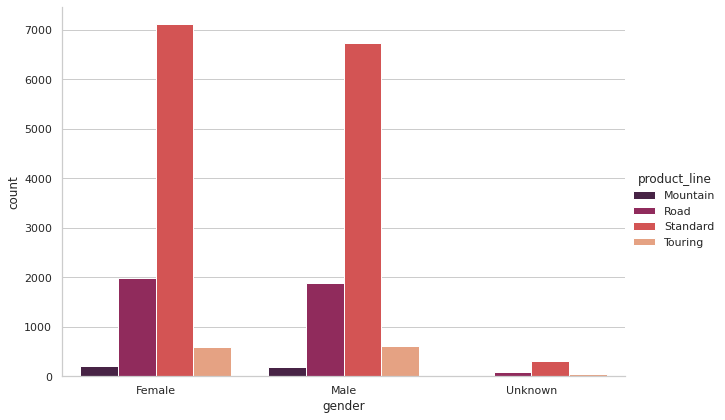

In [ ]:
#3) Group by gender/product_line

# Counting the number of product_line and gender combinations
grouped_gender_product = Full_Transaction_Demo.groupby(['gender', 'product_line']).size()

# Convert Series to DataFrame
grouped_gender_product = grouped_gender_product.reset_index(name='count')

# Plot
sns.catplot(data=grouped_gender_product, x='gender', y='count', hue='product_line', kind='bar', height=6, aspect=1.5, palette = 'rocket')
print(grouped_gender_product)

The above graph has a key information. Even though female customers are more prominent than other gender customers, male customers prefer touring bikes more than female customers of Sprocket bikes.

     gender           brand product_line  count
0    Female  Giant Bicycles         Road    303
1    Female  Giant Bicycles     Standard   1260
2    Female  Giant Bicycles      Touring     84
3    Female  Norco Bicycles     Mountain     99
4    Female  Norco Bicycles         Road    429
5    Female  Norco Bicycles     Standard    895
6    Female      OHM Cycles         Road    402
7    Female      OHM Cycles     Standard   1011
8    Female      OHM Cycles      Touring    117
9    Female           Solex         Road    275
10   Female           Solex     Standard   1772
11   Female           Solex      Touring     97
12   Female   Trek Bicycles     Mountain    118
13   Female   Trek Bicycles         Road    497
14   Female   Trek Bicycles     Standard    899
15   Female        WeareA2B         Road     83
16   Female        WeareA2B     Standard   1275
17   Female        WeareA2B      Touring    292
18     Male  Giant Bicycles         Road    265
19     Male  Giant Bicycles     Standard

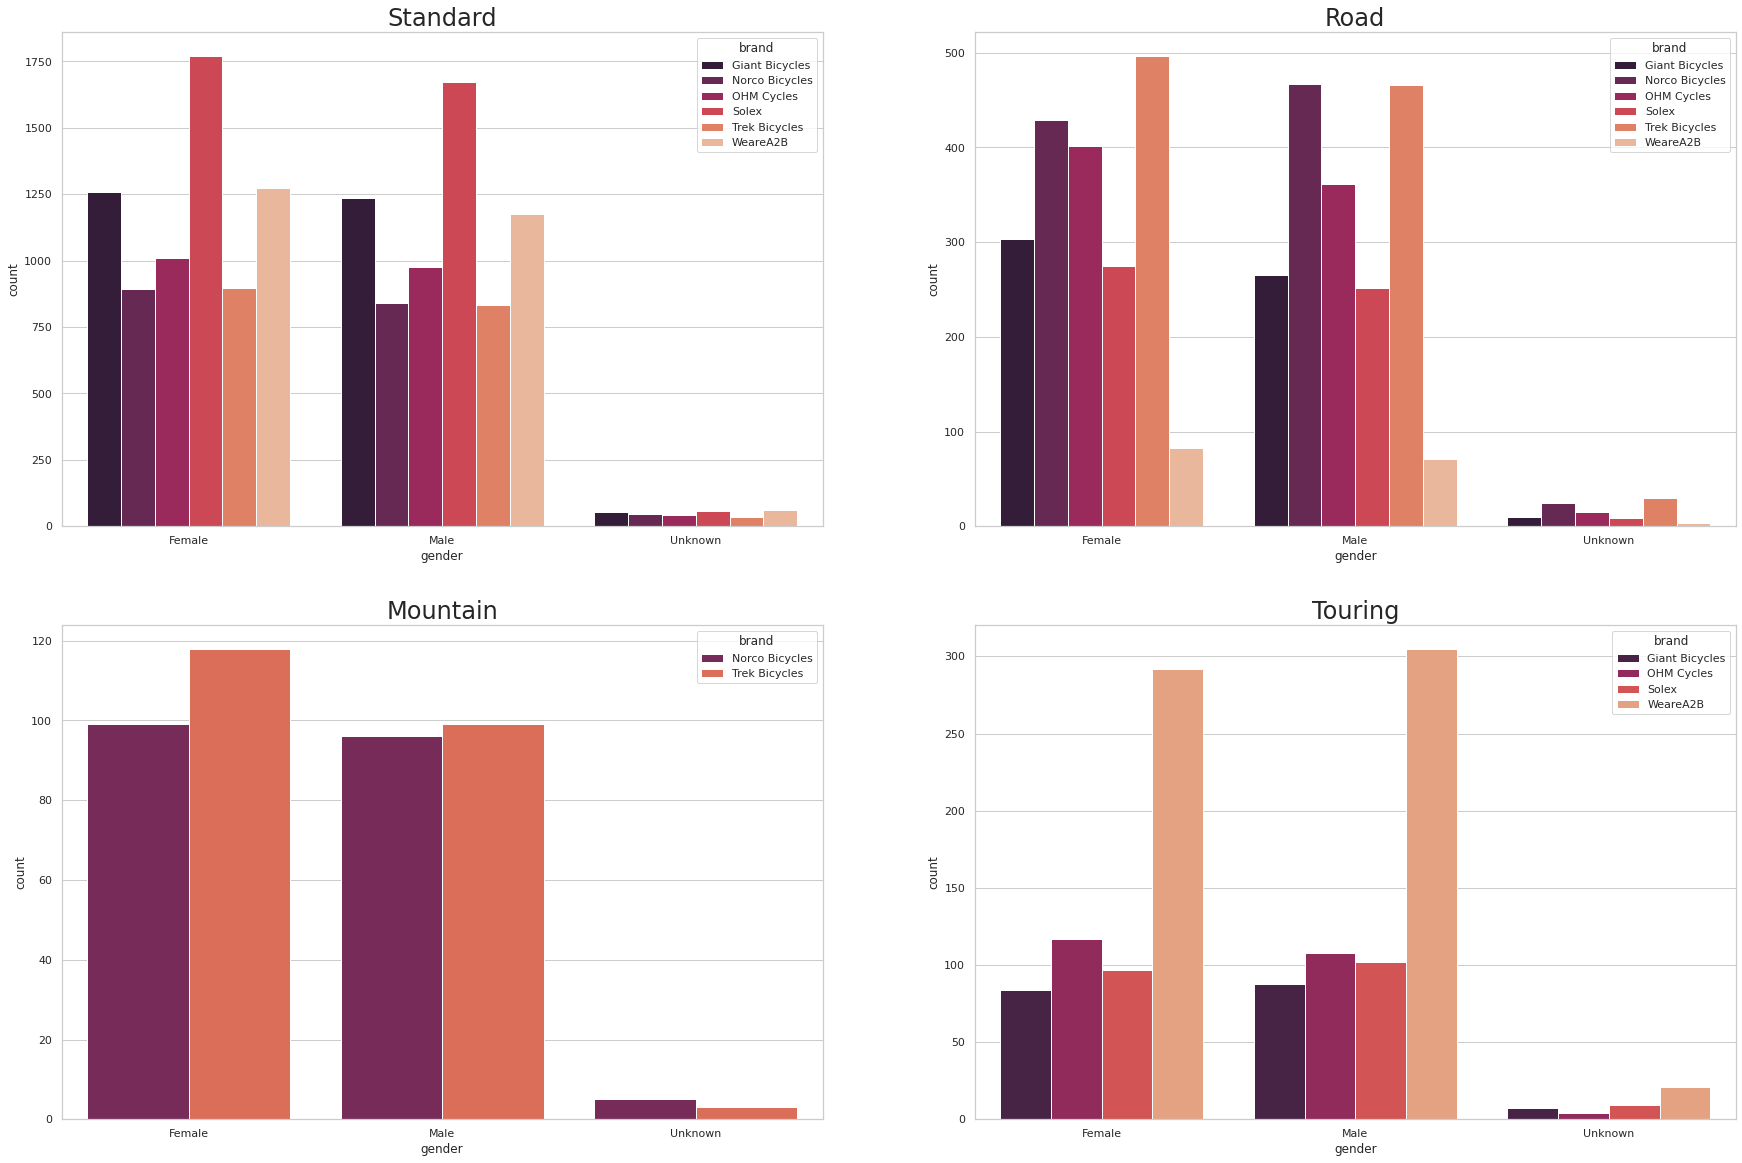

In [ ]:
rows = 2
cols = 2
# Counting the number of product_line and gender combinations
grouped_gender_brand_product = Full_Transaction_Demo.groupby(['gender','brand', 'product_line']).size()

# Convert Series to DataFrame
grouped_gender_brand_product = grouped_gender_brand_product.reset_index(name='count')
unique_product_lines = Full_Transaction_Demo['product_line'].unique()
index = 0
fig, axes = plt.subplots(rows, cols, figsize=(30, 20))
# fig.suptitle('Gender Vs Brand & Product Line',,fontdict={'size':20})

for i in range(rows):
  for j in range(cols):
    sns.barplot(ax=axes[i][j], data=grouped_gender_brand_product[grouped_gender_brand_product['product_line']==unique_product_lines[index]], x='gender', y='count',hue='brand', palette = 'rocket').set(title=unique_product_lines[index])
    # plt.legend(title=unique_product_lines[index], fontsize=20)
    # axes[i][j].set_title('Gender', fontsize=20)
    # axes[i][j].set_title('Count', fontsize=20)
    axes[i][j].set_title(unique_product_lines[index], fontsize=24)
    # plt.tick_params(axis='both', which='major', labelsize=14)
    # axes[0].set_title(unique_product_lines[index])
  # sns.catplot(data=grouped_gender_brand_product[grouped_gender_brand_product['product_line']==unique_product_lines[index]], x='gender', y='count', hue='brand', kind='bar', height=6, aspect=1.5, palette = 'rocket').set(title=unique_product_lines[index])
    index += 1
# Bulbasaur
print(grouped_gender_brand_product)

Text(37.20061496913581, 0.5, 'Count')

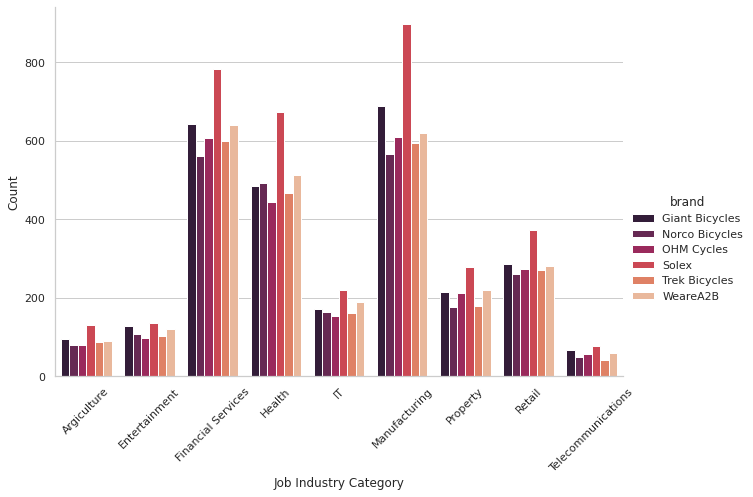

In [ ]:
#4)Group by industry/brand

# Counting the number of industry and brand combinations
grouped_industry_brand = Full_Transaction_Demo.groupby(['job_industry_category', 'brand']).size()

# Convert Series to DataFrame
grouped_industry_brand = grouped_industry_brand.reset_index(name='count')

# Plot
ax = sns.catplot(data=grouped_industry_brand, x='job_industry_category', y='count', hue='brand', kind='bar', height=6, aspect=1.5, palette = 'rocket')
ax.set_xticklabels(rotation=45)

# Set x and y label
plt.xlabel('Job Industry Category')
plt.ylabel('Count')

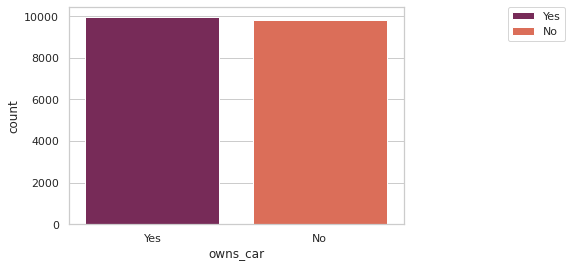

In [ ]:
#5) Customer owns car or not details

# Plot
sns.countplot(x=Full_Transaction_Demo['owns_car'], palette = 'rocket',hue = Full_Transaction_Demo['owns_car'], dodge= False)
plt.legend(bbox_to_anchor=(1.5,1.025), loc='upper right')

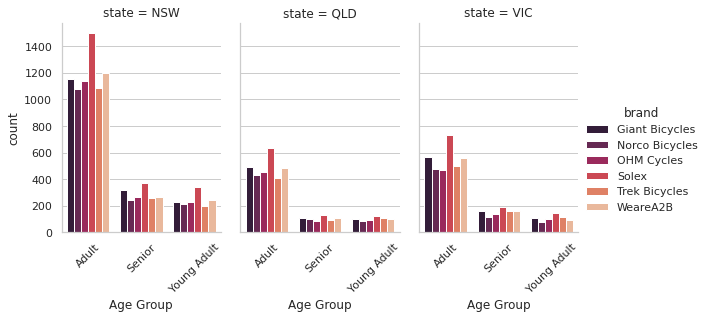

In [ ]:
#6)Group by state/brand/age group

# Counting the number of brands and gender combinations
grouped_state_brand_age = Full_Transaction_Demo.groupby(['state', 'brand', 'Age Group']).size().reset_index(name='count')

# Plotting the catplot
g = sns.catplot(x='Age Group', y='count', hue='brand', col='state', data=grouped_state_brand_age, kind='bar', palette='rocket', height=4, aspect=.7)

# Rotating the x-axis tick labels
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=45)

# TO DO: Redo with product line because it dictates what the bike is used for so it describes customers more.


New South Wales has a very high transaction count under Adult category compared to other states in Australia.

      Age Group           brand  count
0         Adult  Giant Bicycles   2210
1         Adult  Norco Bicycles   1989
2         Adult      OHM Cycles   2059
3         Adult           Solex   2871
4         Adult   Trek Bicycles   1992
5         Adult        WeareA2B   2237
6        Senior  Giant Bicycles    589
7        Senior  Norco Bicycles    457
8        Senior      OHM Cycles    494
9        Senior           Solex    690
10       Senior   Trek Bicycles    507
11       Senior        WeareA2B    535
12  Young Adult  Giant Bicycles    437
13  Young Adult  Norco Bicycles    381
14  Young Adult      OHM Cycles    423
15  Young Adult           Solex    610
16  Young Adult   Trek Bicycles    415
17  Young Adult        WeareA2B    431


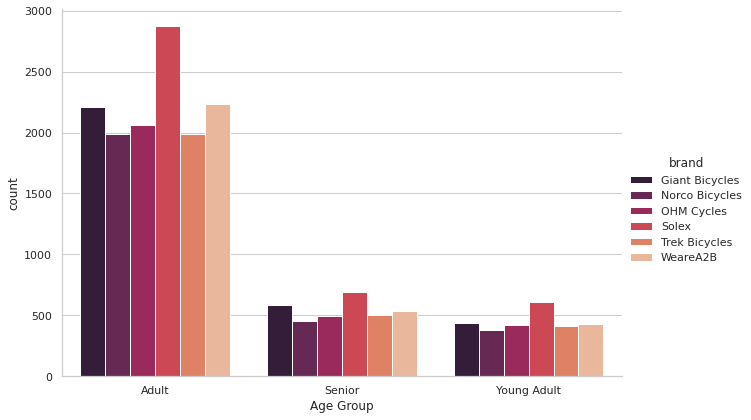

In [ ]:
#7) Group by Age Group and Brand

# Counting the number of Age Group and Brand combinations
grouped_age_brand = Full_Transaction_Demo.groupby(['Age Group','brand']).size()

# Convert Series to DataFrame
grouped_age_brand = grouped_age_brand.reset_index(name='count')

# Plot
sns.catplot(data=grouped_age_brand, x='Age Group', y='count', hue='brand', kind='bar', height=6, aspect=1.5, palette = 'rocket')
print(grouped_age_brand)

Among different age groups, Solex is the most preferred bike, following by giant bicycles. The senior age group is following an anamoly compared to Young Adult and Adult age groups. Among the senior customers, the preference over Trek Bicycles is greater than the OHM cycles.



     Age Group     wealth_segment  count
0        Adult  Affluent Customer   3157
1        Adult     High Net Worth   3530
2        Adult      Mass Customer   6671
3       Senior  Affluent Customer    788
4       Senior     High Net Worth    799
5       Senior      Mass Customer   1685
6  Young Adult  Affluent Customer    775
7  Young Adult     High Net Worth    596
8  Young Adult      Mass Customer   1326


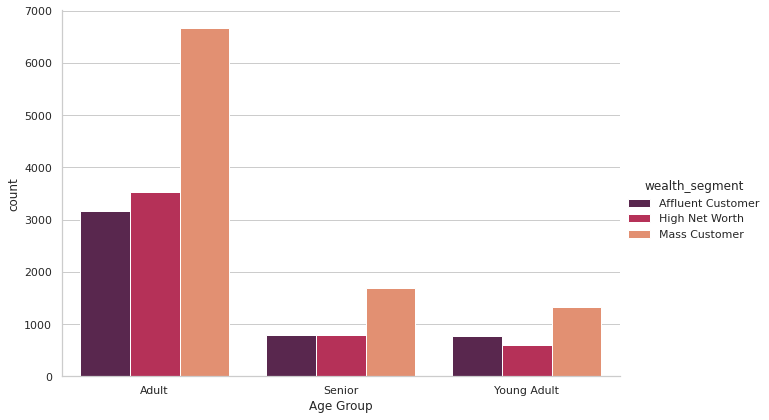

In [ ]:
#8) Group by Age Group/Wealth Segment

# Counting the number of Age Group and wealth segment combinations
grouped_age_wealth = Full_Transaction_Demo.groupby(['Age Group', 'wealth_segment']).size()

# Convert Series to DataFrame
grouped_age_wealth = grouped_age_wealth.reset_index(name='count')

# Plot
sns.catplot(data=grouped_age_wealth, x='Age Group', y='count', hue='wealth_segment', kind='bar', height=6, aspect=1.5, palette = 'rocket')
print(grouped_age_wealth)

      Age Group past_purchase_range  count
0         Adult               01-20   2669
1         Adult               21-40   2745
2         Adult               41-60   2699
3         Adult        More than 60   5114
4         Adult         No Purchase    131
5        Senior               01-20    790
6        Senior               21-40    706
7        Senior               41-60    630
8        Senior        More than 60   1119
9        Senior         No Purchase     27
10  Young Adult               01-20    534
11  Young Adult               21-40    519
12  Young Adult               41-60    536
13  Young Adult        More than 60   1081
14  Young Adult         No Purchase     27


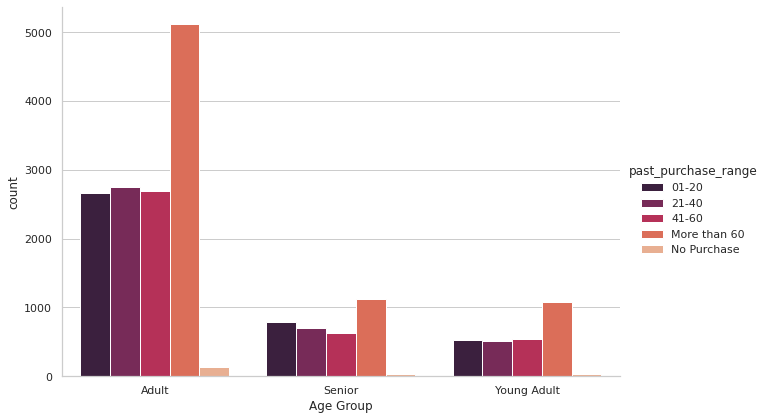

In [ ]:
#9) Group by Age Group/Past Purchase

# Counting the number of Age Group and Past purchases combinations
grouped_age_purchase = Full_Transaction_Demo.groupby(['Age Group', 'past_purchase_range']).size()

# Convert Series to DataFrame
grouped_age_purchase = grouped_age_purchase.reset_index(name='count')

# Plot
sns.catplot(data=grouped_age_purchase, x='Age Group', y='count', hue='past_purchase_range', kind='bar', height=6, aspect=1.5, palette = 'rocket')
print(grouped_age_purchase)

       wealth_segment past_purchase_range  count
0   Affluent Customer               01-20    975
1   Affluent Customer               21-40    987
2   Affluent Customer               41-60   1002
3   Affluent Customer        More than 60   1813
4   Affluent Customer         No Purchase     33
5      High Net Worth               01-20   1086
6      High Net Worth               21-40   1020
7      High Net Worth               41-60   1077
8      High Net Worth        More than 60   1795
9      High Net Worth         No Purchase     62
10      Mass Customer               01-20   2043
11      Mass Customer               21-40   2075
12      Mass Customer               41-60   1890
13      Mass Customer        More than 60   3823
14      Mass Customer         No Purchase     92


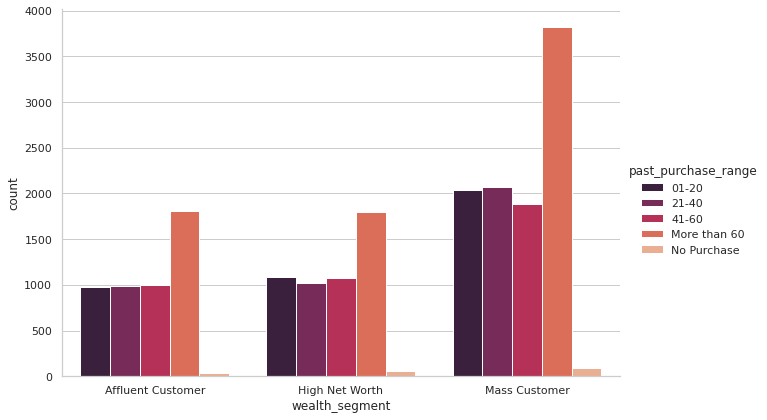

In [ ]:
#10) Group by Wealth Segment/Past Purchase Range

# Counting the number of Past Purchase and wealth segment combinations
grouped_wealth_purchase = Full_Transaction_Demo.groupby(['wealth_segment', 'past_purchase_range']).size()

# Convert Series to DataFrame
grouped_wealth_purchase = grouped_wealth_purchase.reset_index(name='count')

# Plot
sns.catplot(data=grouped_wealth_purchase, x='wealth_segment', y='count', hue='past_purchase_range', kind='bar', height=6, aspect=1.5, palette = 'rocket')
print(grouped_wealth_purchase)

## Customer Behavior - RFM

In [ ]:
# Load data
data = Full_Transaction_Demo

# Convert transaction_date column to datetime format
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
# Calculate recency, frequency, and monetary value for each customer
snapshot_date = data['transaction_date'].max() + dt.timedelta(days=1)
data_rfm = data.groupby(['customer_id']).agg({
    'transaction_date': lambda x: (snapshot_date - x.max()).days,
    'transaction_id': 'count',
    'list_price': 'sum'})

# Rename columns to recency, frequency, and monetary_value
data_rfm.rename(columns={
    'transaction_date': 'recency',
    'transaction_id': 'frequency',
    'list_price': 'monetary_value'
}, inplace=True)

data_rfm.head(5)


,recency,frequency,monetary_value
customer_id,,,
1,8,11,9084.45
2,129,3,4149.07
3,103,8,9888.23
4,196,2,1047.72
5,17,6,5903.20


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

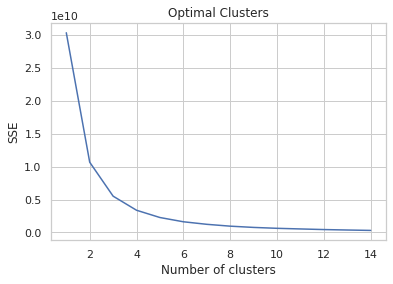

In [ ]:
X = data_rfm[['recency', 'frequency','monetary_value']]

# Define a range of number of clusters to test
k_range = range(1, 15)

# Compute the within-cluster sum of squared errors for each k
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the SSE for each k
plt.plot(k_range, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Optimal Clusters')
plt.show()

In [ ]:
X = data_rfm[['recency', 'frequency','monetary_value']]

kmeans = KMeans(n_clusters=10, random_state=42).fit(X)

data_rfm['cluster'] = kmeans.labels_

data_rfm.sort_values(by=['cluster'], inplace=True)

cluster_mean = data_rfm.groupby('cluster')[['recency', 'frequency', 'monetary_value']].mean()

cluster_size = data_rfm.groupby('cluster').size().reset_index(name='size')

cluster_stats = pd.merge(cluster_mean, cluster_size, on='cluster')

print(cluster_stats)


   cluster     recency  frequency  monetary_value  size
0        0   60.181644   5.709369     6285.541415   523
1        1   83.284211   3.263158     2864.991447   380
2        2   41.829787   8.372340    10264.936064   282
3        3   33.328947   9.368421    12070.936842   152
4        4   46.848564   7.456919     8757.702533   383
5        5   63.093236   4.946984     5170.636417   547
6        6   28.619048  11.158730    14719.259048    63
7        7  126.845070   2.145540     1377.476573   213
8        8   68.924335   4.159509     4060.649223   489
9        9   49.790043   6.571429     7461.560541   462


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Customer Segment could be:
Champion Customer [clusters 6] 2% - highest frequency, highest monetary_value and most recent visit

Potential Champion Customer [clusters 2,3] 12% - higher frequency, higher monetary_value and more recent visit

Loyalist Customer [clusters 4, 9] 24% - high frequency, highest monetary_value and recent visit

Can't loose Customer[clusters 0,5,8] 45% - Medium frequency, Medium monetary_value, Medium recent visit

Need Attention Customer [clusters 1] 11% - low frequency, low monetary_value and low recent visit

Sleeping Soon customer [clusters 7] 6% - lowest frequency, lowest monetary_value and long time no visit

In [ ]:
# Create tree map for cluster
# Create a DataFrame with the data
df = pd.DataFrame({
    'Segment': ['Champion', 'Potential Champion', 'Loyalist', 'Can\'t lose', 'Need attention', 'Sleeping soon'],
    'Percentage': [2, 12, 24, 45, 11, 6]
})

# Create a tree map using plotly
fig = px.treemap(df, path=['Segment'], values='Percentage')

# Customize the font and color of the labels
fig.update_traces(textfont_color='white', textfont_size=20)

import plotly.express as px
import pandas as pd

# Create a DataFrame with the data
df = pd.DataFrame({
    'Segment': ['Champion', 'Potential Champion', 'Loyalist', 'Can\'t lose', 'Need attention', 'Sleeping soon'],
    'Percentage': [2, 12, 24, 45, 11, 6]
})

# Create a tree map using plotly
fig = px.treemap(df, path=['Segment'], values='Percentage')

# Customize the font and color of the labels
fig.update_traces(textfont_color='white', textfont_size=20)


# Show the tree map
fig.show()


## Customer Behavior - Purchase Choice
variables include:Brand Diversity,Product_line Diversity,Product_size Diversity


In [ ]:
# Data source is Full_Transaction_Demo
data_choice = Full_Transaction_Demo

# Summarize the number of unique categories bought by each customer ID
data_choice = data_choice.groupby(['customer_id']).agg({
    'Number of Unique Brands Bought_x': 'max',
    'product_line': 'nunique',
    'product_size': 'nunique'
}).reset_index()

# Rename columns to Brand Diversity, Product_line Diversity, Product_size Diversity
data_choice.rename(columns={
    'Number of Unique Brands Bought_x': 'Brand Diversity',
    'product_line': 'Product_line Diversity',
    'product_size': 'Product_size Diversity'
}, inplace=True)

# Create one-hot encoding for each category
data_encoded = pd.get_dummies(data_choice, columns=['Brand Diversity', 'Product_line Diversity', 'Product_size Diversity'])

# Perform hierarchical clustering
Z = linkage(data_encoded.drop('customer_id', axis=1), method='ward')

# Set maximum distance for clustering
max_d = 18

# Get clusters based on maximum distance
clusters = fcluster(Z, max_d, criterion='distance')

# Convert clustering results to a DataFrame
clusters_df = pd.DataFrame(clusters, columns=['cluster'])

# Combine clustering results and original data
data_choice = pd.concat([data_choice, clusters_df], axis=1)

# Get clustering statistics
cluster_median = data_choice.groupby('cluster')[['Brand Diversity', 'Product_line Diversity', 'Product_size Diversity']].median()
cluster_size = data_choice.groupby('cluster').size().reset_index(name='size')
cluster_stats = pd.merge(cluster_median, cluster_size, on='cluster')

# Print clustering statistics
print(cluster_median)


         Brand Diversity  Product_line Diversity  Product_size Diversity
cluster                                                                 
1                    4.0                     1.0                     3.0
2                    4.0                     3.0                     3.0
3                    4.0                     2.0                     3.0
4                    5.0                     2.0                     3.0
5                    3.0                     2.0                     1.0
6                    2.0                     1.0                     1.0
7                    4.0                     2.0                     2.0
8                    3.0                     2.0                     2.0
9                    5.0                     2.0                     2.0
10                   3.0                     1.0                     2.0
11                   4.0                     3.0                     2.0


Brand Diversity: Purchased Brand Type 4,5 – High, 3 – Medium , 1,2 – Low​

Product_line Diversity: Purchased Product_line Type 3 – High, 2 – Medium,1 – Low​

Product_size Diversity: Product_size Diversity Type 3 – High, 2 – Medium,1 – Low

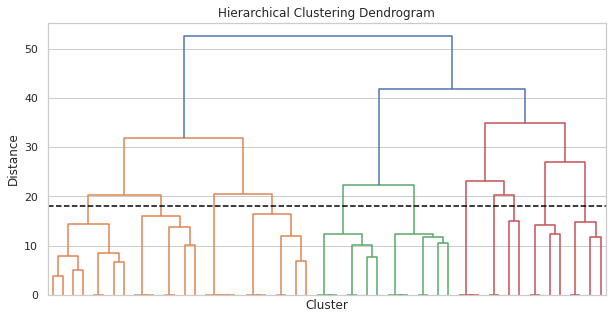

In [ ]:

# Generate dendrogram for hierarchical clustering
fig, ax = plt.subplots(figsize=(10, 5))
dendrogram(Z, truncate_mode='level', p=5, show_leaf_counts=False, no_labels=True, ax=ax)
plt.axhline(y=max_d, color='black', linestyle='--')
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


#Product Segmentation

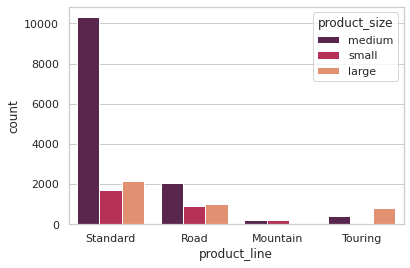

In [ ]:
sns.countplot(data=Full_Transaction_Demo, x="product_line", hue="product_size", palette = "rocket")
plt.show()

In [ ]:
Transact = Transactions.drop(['transaction_id','transaction_date', 'online_order', 'order_status'], axis=1)

Transact.head(5)

,product_id,customer_id,brand,product_line,product_class,product_size,list_price,standard_cost,Profit,Margin,Number of Unique Brands Bought
0,86,1,OHM Cycles,Standard,medium,medium,235.63,125.07,110.56,0.883985,5.0
1,38,1,Solex,Standard,medium,medium,1577.53,826.51,751.02,0.908664,5.0
2,47,1,Trek Bicycles,Road,low,small,1720.70,1531.42,189.28,0.123598,5.0
3,72,1,Norco Bicycles,Standard,medium,medium,360.40,270.30,90.10,0.333333,5.0
4,2,1,Solex,Standard,medium,medium,71.49,53.62,17.87,0.333271,5.0


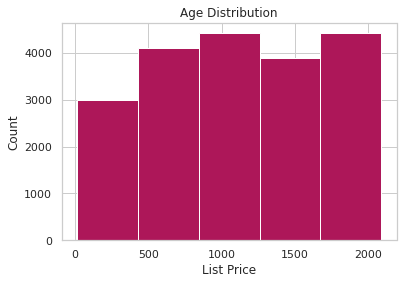

In [ ]:
plt.hist(Transactions['list_price'], bins=5, color = "#ad1759")
plt.xlabel('List Price')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

## Conduct Clustering on the different product ID and list price

- Objective: identify which product ID are accessories or actual bikes
- **Why List Price vs Standard Cost**: List Price matches the market price of the bike or accessory while standard cost is the cost in relation to the company, should the cost go down then there is an incident of bulk buying
- K means, DBScan and GMM

#### Results
- According to the silhoette score, K Means have the higher clustering score out of teh three

In [ ]:
#Nomalize Transactions Table with selected columns

Transactions_norm = Transactions[['product_id', 'list_price', 'Profit', 'Margin']]

scaler = MinMaxScaler()

Transactions_norm[['list_price', 'Profit', 'Margin']] = scaler.fit_transform(Transactions_norm[['list_price', 'Profit', 'Margin']])

Transactions_norm

<ipython-input-47-a95d0c98805e>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,product_id,list_price,Profit,Margin
0,86,0.107538,0.062294,0.008475
1,38,0.752849,0.439535,0.008735
2,47,0.821699,0.108661,0.000481
3,72,0.167539,0.050243,0.002686
4,2,0.028604,0.007698,0.002686
...,...,...,...,...
19995,22,0.023242,0.006055,0.002685
19996,40,0.695450,0.340727,0.006191
19997,0,0.194748,0.058575,0.002686
19998,0,0.167539,0.050243,0.002686


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

[0.6438077901508623, 0.5975295070613802, 0.5999457610844744, 0.5502193196536997, 0.5590868761174226, 0.5444450693450289, 0.5569085354412192, 0.5645144246057402, 0.5616771859949157, 0.5699117749943788, 0.5665178204740564, 0.5661984777265183, 0.5630167107803852]
[]
[0.6434768561881968, 0.599949962872908, 0.5978490885004045, 0.5751228914935731, 0.5379696503275948, 0.5382418643188843, 0.4977920153408403, 0.5515743810782419, 0.5751142001543031, 0.4899635671012729, 0.5235408288386536, 0.5679580874899927, 0.5641504351212059]


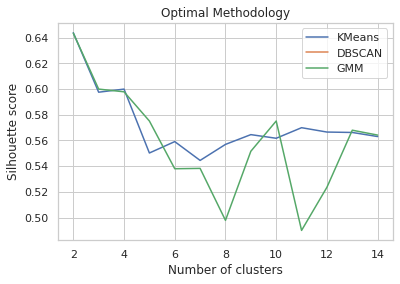

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

trans_cluster = Transactions_norm.groupby('product_id').agg({'list_price':['mean']})

X = trans_cluster[['list_price']]

# Define range of cluster numbers to test
k_range = range(2, 15)
eps_range = np.arange(0.1, 1.0, 0.1)
min_samples_range = range(2, 15)
gmm_range = range(2, 15)

# Initialize lists to store silhouette scores
k_scores = []
dbscan_scores = []
gmm_scores = []

# Test KMeans clustering
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    k_scores.append(score)

print(k_scores)

# Test DBSCAN clustering
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        if len(np.unique(labels)) > 1:
            score = silhouette_score(X, labels)
            dbscan_scores.append(score)

print(dbscan_scores)

# Test GMM clustering
for k in gmm_range:
    gmm = GaussianMixture(n_components=k)
    labels = gmm.fit_predict(X)
    score = silhouette_score(X, labels)
    gmm_scores.append(score)

print(gmm_scores)

# Plot results
plt.plot(k_range, k_scores, label='KMeans')
plt.plot(dbscan_scores, label='DBSCAN')
plt.plot(gmm_range, gmm_scores, label='GMM')
plt.title('Optimal Methodology')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.legend()
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

[6.81310183863204, 1.625136289741354, 0.7605277075977519, 0.4043849961176328, 0.2731755145275278, 0.19557234381053834, 0.13799799255273898, 0.10314509099218962, 0.0788915494040346, 0.06562309577542785, 0.051256637638757645, 0.0423663677766508, 0.03410170876132662, 0.030391735466079685]


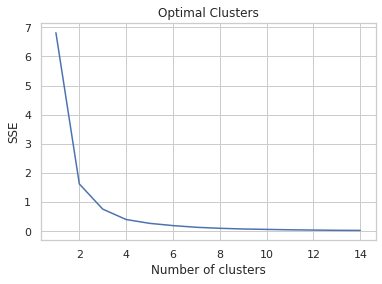

In [ ]:
# Group by product id and list price

X = trans_cluster[['list_price']]

# Define a range of number of clusters to test
k_range = range(1, 15)

# Compute the within-cluster sum of squared errors for each k
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

print (sse)
# Plot the SSE for each k
plt.plot(k_range, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Optimal Clusters')
plt.show()

### Conduct K Means Clustering

Optimal number of clusters is = 4 (Elbow Method)

In [ ]:
X = trans_cluster[['list_price']]

kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

trans_cluster['Cluster_list_price'] = kmeans.labels_

trans_cluster.columns = ['ave_list_price', 'cluster_list_price']
trans_cluster

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,ave_list_price,cluster_list_price
product_id,,
0,0.141621,0
1,0.698986,3
2,0.076419,0
3,1.000000,1
4,0.580314,3
...,...,...
96,0.614849,3
97,0.173945,0
98,0.228533,0


now we define each cluster

In [ ]:
Transact_Full = pd.merge(Transactions, trans_cluster, on = "product_id", how="left")
Transact_Full.drop(['ave_list_price'], axis=1, inplace=True)
Transact_Full

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,Profit,Margin,Number of Unique Brands Bought,cluster_list_price
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.070000,110.560000,0.883985,5.0,0
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.510000,751.020000,0.908664,5.0,1
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.420000,189.280000,0.123598,5.0,1
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.300000,90.100000,0.333333,5.0,0
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,17.870000,0.333271,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19798,14870,22,3500,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.260000,15.080000,0.333186,4.0,0
19799,19836,40,3500,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.900000,583.270000,0.666670,4.0,1
19800,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,104.244984,0.333333,3.0,0
19801,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,90.100012,0.333333,3.0,0


In [ ]:
cluster_def = Transact_Full.groupby('cluster_list_price').agg({'list_price':['mean','count']})

cluster_def.columns = ['ave_list_price', 'count']

def product_type(ave_list_price):
    if ave_list_price < 400:
        return 'Accessory'
    elif ave_list_price < 1000:
        return 'Low Priced Bike'
    elif ave_list_price < 1500:
        return 'Mid Priced Bike'
    else:
        return 'High Priced Bike'

cluster_def['product_type'] = cluster_def['ave_list_price'].apply(lambda x: product_type(x))

cluster_def

,ave_list_price,count,product_type
cluster_list_price,,,
0,324.104950,3988,Accessory
1,1786.114907,5374,High Priced Bike
2,751.693596,4458,Low Priced Bike
3,1286.899489,5983,Mid Priced Bike


Given the price difference and research, lowest retail cost of bikes is around the 400 and above range (these are for the low tiered bikes) as such any cluster below will be deemed as accessories while other bikes will be subdiveded by their costliness

### Complete Dataset

In [ ]:
# Combine the different tables to create consolidated dataset

Transact_Full = pd.merge(Transact_Full, cluster_def, on = "cluster_list_price", how="left")

def bike_type(brand):
    if (brand == "Giant Bicycles" or brand == "Norco Bicycles" or brand == "Trek Bicycles"):
        return 'Manual Bikes'
    else:
        return 'Electric Bikes'

Transact_Full['bike_type'] = Transact_Full['brand'].apply(lambda x: bike_type(x))

Transact_Full

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,Profit,Margin,Number of Unique Brands Bought,cluster_list_price,ave_list_price,count,product_type,bike_type
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.070000,110.560000,0.883985,5.0,0,324.104950,3988,Accessory,Electric Bikes
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.510000,751.020000,0.908664,5.0,1,1786.114907,5374,High Priced Bike,Electric Bikes
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.420000,189.280000,0.123598,5.0,1,1786.114907,5374,High Priced Bike,Manual Bikes
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.300000,90.100000,0.333333,5.0,0,324.104950,3988,Accessory,Manual Bikes
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,17.870000,0.333271,5.0,0,324.104950,3988,Accessory,Electric Bikes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19798,14870,22,3500,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.260000,15.080000,0.333186,4.0,0,324.104950,3988,Accessory,Electric Bikes
19799,19836,40,3500,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.900000,583.270000,0.666670,4.0,1,1786.114907,5374,High Priced Bike,Electric Bikes
19800,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,104.244984,0.333333,3.0,0,324.104950,3988,Accessory,Electric Bikes
19801,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,90.100012,0.333333,3.0,0,324.104950,3988,Accessory,Manual Bikes


Things to understand about bike brands
- Giant Bicycles == High end bikes primarily standard and road
- Norco Bicycles == Average level bikes primarily mountain
- OHM Cycles == electric bikes
- Solex == Motorized Bikes ~ same as electric
- Trek Bikes == same as Giant
- WeareA2B == electric bikes

## Analyze Brand Performance - ANOVA Test

This section analyzes the different brands and use ANOVA to test if their prices, profits and margins are better

### Brand to list price (no accessory)

In [ ]:
#Overview of the different brands

ANOVA_Brand = Transact_Full.drop(Transact_Full[Transact_Full['product_type'] == 'Accessory'].index)

brand_overview = ANOVA_Brand.groupby('brand').agg({'list_price':['mean','median','max', 'min', 'count']})

brand_overview = brand_overview.reset_index()

brand_overview

brand   list_price                                
                          mean   median      max     min count
0  Giant Bicycles  1347.403877  1403.50  1977.36  569.56  2907
1  Norco Bicycles  1055.123558  1148.64  1661.92  543.39  2215
2      OHM Cycles  1376.270805  1280.28  2005.66  742.54  1999
3           Solex  1254.533952  1163.89  2083.94  416.98  3391
4   Trek Bicycles  1346.388434  1469.44  2091.47  495.72  2477
5        WeareA2B  1434.839112  1415.01  1992.93  642.31  2826

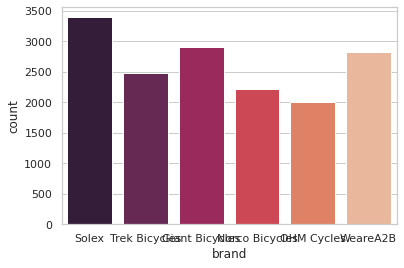

In [ ]:
sns.countplot(data=ANOVA_Brand, x="brand", palette = "rocket")
plt.show()

F-statistic: 210.43778652595958
p-value: 5.24100065286424e-218


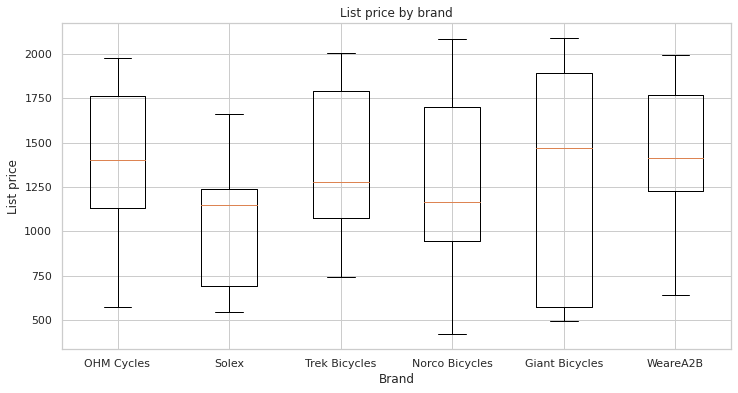

In [ ]:
#ANOVA for brand and list price

ANOVA_brand = []
for brand, group in ANOVA_Brand.groupby('brand'):
    ANOVA_brand.append(group['list_price'])

# Conduct the ANOVA test
f_statistic, p_value = f_oneway(*ANOVA_brand)
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Visualize using a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(ANOVA_brand)
plt.xticks(range(1, len(ANOVA_brand)+1), Transactions['brand'].unique())
plt.xlabel('Brand')
plt.ylabel('List price')
plt.title('List price by brand')
plt.show()

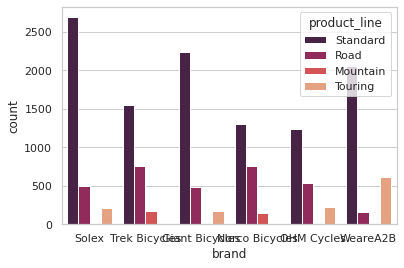

In [ ]:
sns.countplot(data=ANOVA_Brand, x="brand", hue = 'product_line', palette = "rocket")
plt.show()

### Brand to profit margin

In [ ]:
brand_overview = Transactions.groupby('brand').agg({'Margin':['mean','median','max', 'min', 'count']})

brand_overview = brand_overview.reset_index()

brand_overview

brand    Margin                                     
                       mean    median        max       min count
0  Giant Bicycles  0.728211  0.645734   2.112124  0.077834  3312
1  Norco Bicycles  0.636654  0.333342   4.023455  0.123595  2910
2      OHM Cycles  3.904432  0.666642  35.611496  0.112586  3043
3           Solex  2.382855  0.773638  16.311099  0.123598  4253
4   Trek Bicycles  1.717417  0.666678   5.849158  0.123593  2990
5        WeareA2B  9.473002  2.063206  95.193452  0.123595  3295

F-statistic: 377.46215896075444
p-value: 0.0


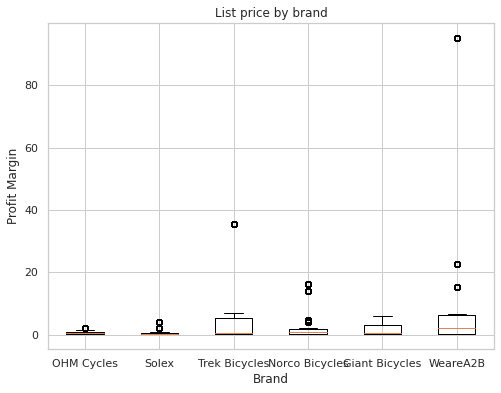

In [ ]:
ANOVA_brand = []
for brand, group in Transactions.groupby('brand'):
    ANOVA_brand.append(group['Margin'])

# Conduct the ANOVA test
f_statistic, p_value = f_oneway(*ANOVA_brand)
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Visualize using a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(ANOVA_brand)
plt.xticks(range(1, len(ANOVA_brand)+1), Transactions['brand'].unique())
plt.xlabel('Brand')
plt.ylabel('Profit Margin')
plt.title('List price by brand')
plt.show()

When it comes to highest profit margins, WeareA2B Bikes have the higher median margin (even with high levels of outliers) while Norco have the lowest median margin

Electric Bikes have highest ave margins, may be due to low cost due to high inventory and bulk purchases

### ANOVA Test of the different Categories

The following characteristics will be considered
- Brand
- Product Line
- Product Type
- Brand Type

In [ ]:
product_overview = Transact_Full.groupby(['brand', 'bike_type', 'product_line', 'product_type']).agg({'list_price':['mean','median','max', 'min', 'count']})

product_overview = product_overview.reset_index()

product_overview

brand       bike_type product_line      product_type  \
                                                                    
0   Giant Bicycles    Manual Bikes         Road         Accessory   
1   Giant Bicycles    Manual Bikes         Road  High Priced Bike   
2   Giant Bicycles    Manual Bikes         Road   Low Priced Bike   
3   Giant Bicycles    Manual Bikes         Road   Mid Priced Bike   
4   Giant Bicycles    Manual Bikes     Standard         Accessory   
5   Giant Bicycles    Manual Bikes     Standard  High Priced Bike   
6   Giant Bicycles    Manual Bikes     Standard   Low Priced Bike   
7   Giant Bicycles    Manual Bikes     Standard   Mid Priced Bike   
8   Giant Bicycles    Manual Bikes      Touring  High Priced Bike   
9   Giant Bicycles    Manual Bikes      Touring   Mid Priced Bike   
10  Norco Bicycles    Manual Bikes     Mountain         Accessory   
11  Norco Bicycles    Manual Bikes     Mountain   Low Priced Bike   
12  Norco Bicycles    Manual Bikes         Road         Accessory   
13  Norco Bicycles    Manual Bikes         Road   Low Priced Bike   
14  Norco Bicycles    Manual Bikes         Road   Mid Priced Bike   
15  Norco Bicycles    Manual Bikes     Standard         Accessory   
16  Norco Bicycles    Manual Bikes     Standard  High Priced Bike   
17  Norco Bicycles    Manual Bikes     Standard   Low Priced Bike   
18  Norco Bicycles    Manual Bikes     Standard   Mid Priced Bike   
19      OHM Cycles  Electric Bikes         Road         Accessory   
20      OHM Cycles  Electric Bikes         Road  High Priced Bike   
21      OHM Cycles  Electric Bikes         Road   Low Priced Bike   
22      OHM Cycles  Electric Bikes         Road   Mid Priced Bike   
23      OHM Cycles  Electric Bikes     Standard         Accessory   
24      OHM Cycles  Electric Bikes     Standard  High Priced Bike   
25      OHM Cycles  Electric Bikes     Standard   Low Priced Bike   
26      OHM Cycles  Electric Bikes     Standard   Mid Priced Bike   
27      OHM Cycles  Electric Bikes      Touring   Low Priced Bike   
28      OHM Cycles  Electric Bikes      Touring   Mid Priced Bike   
29           Solex  Electric Bikes         Road         Accessory   
30           Solex  Electric Bikes         Road  High Priced Bike   
31           Solex  Electric Bikes         Road   Low Priced Bike   
32           Solex  Electric Bikes         Road   Mid Priced Bike   
33           Solex  Electric Bikes     Standard         Accessory   
34           Solex  Electric Bikes     Standard  High Priced Bike   
35           Solex  Electric Bikes     Standard   Low Priced Bike   
36           Solex  Electric Bikes     Standard   Mid Priced Bike   
37           Solex  Electric Bikes      Touring  High Priced Bike   
38   Trek Bicycles    Manual Bikes     Mountain         Accessory   
39   Trek Bicycles    Manual Bikes     Mountain   Low Priced Bike   
40   Trek Bicycles    Manual Bikes         Road         Accessory   
41   Trek Bicycles    Manual Bikes         Road  High Priced Bike   
42   Trek Bicycles    Manual Bikes         Road   Low Priced Bike   
43   Trek Bicycles    Manual Bikes         Road   Mid Priced Bike   
44   Trek Bicycles    Manual Bikes     Standard         Accessory   
45   Trek Bicycles    Manual Bikes     Standard  High Priced Bike   
46   Trek Bicycles    Manual Bikes     Standard   Low Priced Bike   
47   Trek Bicycles    Manual Bikes     Standard   Mid Priced Bike   
48        WeareA2B  Electric Bikes         Road   Low Priced Bike   
49        WeareA2B  Electric Bikes         Road   Mid Priced Bike   
50        WeareA2B  Electric Bikes     Standard         Accessory   
51        WeareA2B  Electric Bikes     Standard  High Priced Bike   
52        WeareA2B  Electric Bikes     Standard   Low Priced Bike   
53        WeareA2B  Electric Bikes     Standard   Mid Priced Bike   
54        WeareA2B  Electric Bikes      Touring  High Priced Bike   
55        WeareA2B  Electric Bikes      Touring   Mid Priced Bike   

     list_

In [ ]:
product_overview = Transact_Full.groupby(['brand', 'bike_type', 'product_line', 'product_type']).agg({'Margin':['mean','median','max', 'min', 'count']})

product_overview = product_overview.reset_index()

product_overview

brand       bike_type product_line      product_type     Margin  \
                                                                        mean   
0   Giant Bicycles    Manual Bikes         Road         Accessory   0.230691   
1   Giant Bicycles    Manual Bikes         Road  High Priced Bike   0.854987   
2   Giant Bicycles    Manual Bikes         Road   Low Priced Bike   0.231515   
3   Giant Bicycles    Manual Bikes         Road   Mid Priced Bike   0.854987   
4   Giant Bicycles    Manual Bikes     Standard         Accessory   0.585690   
5   Giant Bicycles    Manual Bikes     Standard  High Priced Bike   1.029475   
6   Giant Bicycles    Manual Bikes     Standard   Low Priced Bike   0.940384   
7   Giant Bicycles    Manual Bikes     Standard   Mid Priced Bike   0.604002   
8   Giant Bicycles    Manual Bikes      Touring  High Priced Bike   1.169072   
9   Giant Bicycles    Manual Bikes      Touring   Mid Priced Bike   1.169072   
10  Norco Bicycles    Manual Bikes     Mountain         Accessory   0.123597   
11  Norco Bicycles    Manual Bikes     Mountain   Low Priced Bike   0.123597   
12  Norco Bicycles    Manual Bikes         Road         Accessory   0.469722   
13  Norco Bicycles    Manual Bikes         Road   Low Priced Bike   0.673554   
14  Norco Bicycles    Manual Bikes         Road   Mid Priced Bike   1.774242   
15  Norco Bicycles    Manual Bikes     Standard         Accessory   0.273864   
16  Norco Bicycles    Manual Bikes     Standard  High Priced Bike   0.541741   
17  Norco Bicycles    Manual Bikes     Standard   Low Priced Bike   0.517786   
18  Norco Bicycles    Manual Bikes     Standard   Mid Priced Bike   0.741321   
19      OHM Cycles  Electric Bikes         Road         Accessory   0.560160   
20      OHM Cycles  Electric Bikes         Road  High Priced Bike   0.123596   
21      OHM Cycles  Electric Bikes         Road   Low Priced Bike   0.216347   
22      OHM Cycles  Electric Bikes         Road   Mid Priced Bike   0.440076   
23      OHM Cycles  Electric Bikes     Standard         Accessory   1.158933   
24      OHM Cycles  Electric Bikes     Standard  High Priced Bike  10.051097   
25      OHM Cycles  Electric Bikes     Standard   Low Priced Bike   5.803915   
26      OHM Cycles  Electric Bikes     Standard   Mid Priced Bike   8.771558   
27      OHM Cycles  Electric Bikes      Touring   Low Priced Bike   0.149094   
28      OHM Cycles  Electric Bikes      Touring   Mid Priced Bike   0.149094   
29           Solex  Electric Bikes         Road         Accessory   0.333313   
30           Solex  Electric Bikes         Road  High Priced Bike   0.654201   
31           Solex  Electric Bikes         Road   Low Priced Bike   0.333312   
32           Solex  Electric Bikes         Road   Mid Priced Bike   0.604701   
33           Solex  Electric Bikes     Standard         Accessory   0.564597   
34           Solex  Electric Bikes     Standard  High Priced Bike   4.943378   
35           Solex  Electric Bikes     Standard   Low Priced Bike   1.373637   
36           Solex  Electric Bikes     Standard   Mid Priced Bike   3.769712   
37           Solex  Electric Bikes      Touring  High Priced Bike   2.087181   
38   Trek Bicycles    Manual Bikes     Mountain         Accessory   0.250005   
39   Trek Bicycles    Manual Bikes     Mountain   Low Priced Bike   0.250005   
40   Trek Bicycles    Manual Bikes         Road         Accessory   0.346633   
41   Trek Bicycles    Manual Bikes         Road  High Priced Bike   1.456270   
42   Trek Bicycles    Manual Bikes         Road   Low Priced Bike   1.062050   
43   Trek Bicycles    Manual Bikes         Road   Mid Priced Bike   2.425230   
44   Trek Bicycles    Manual Bikes     Standard         Accessory   0.599951   
45   Trek Bicycles    Manual Bikes     Standard  High Priced Bike   2.973142   
46   Trek Bicycles    Manual Bikes     Standard   Low Priced Bike   1.233312   
47   Trek Bicycles    Manual Bikes     Standard   Mid Priced Bike   2.197362   
48        Wea

In [ ]:
prod_overview = Transact_Full.groupby(['brand', 'bike_type', 'product_line', 'product_type']).agg({'list_price':['mean','median'], 'Margin': ['mean','median','count']})

prod_overview = prod_overview.reset_index()

prod_overview.columns = ['brand', 'bike_type', 'product_line', 'product_type', 'mean_price', 'median_price', 'mean_margin', 'median_margin', 'count']

prod_overview

,brand,bike_type,product_line,product_type,mean_price,median_price,mean_margin,median_margin,count
0,Giant Bicycles,Manual Bikes,Road,Accessory,693.735745,792.90,0.230691,0.333322,94
1,Giant Bicycles,Manual Bikes,Road,High Priced Bike,1538.990000,1538.99,0.854987,0.854987,123
2,Giant Bicycles,Manual Bikes,Road,Low Priced Bike,694.531068,792.90,0.231515,0.333322,309
3,Giant Bicycles,Manual Bikes,Road,Mid Priced Bike,1538.990000,1538.99,0.854987,0.854987,53
4,Giant Bicycles,Manual Bikes,Standard,Accessory,352.265048,230.91,0.585690,0.333353,311
5,Giant Bicycles,Manual Bikes,Standard,High Priced Bike,1810.422257,1812.75,1.029475,0.645734,647
6,Giant Bicycles,Manual Bikes,Standard,Low Priced Bike,825.485275,642.70,0.940384,0.666662,436
7,Giant Bicycles,Manual Bikes,Standard,Mid Priced Bike,1348.909759,1311.44,0.604002,0.469911,1160
8,Giant Bicycles,Manual Bikes,Touring,High Priced Bike,1873.970000,1873.97,1.169072,1.169072,138
9,Giant Bicycles,Manual Bikes,Touring,Mid Priced Bike,1873.970000,1873.97,1.169072,1.169072,41


## Product Sales Performance

- Identify product performance and what to do with them

### Method - 80/20 Pareto
- Take the lowest 20% quartile

Result: Very limited and prone to error

In [ ]:
q = prod_overview.quantile(0.20)

lowest_20th_percentile = prod_overview[(prod_overview["median_margin"] <= q["median_margin"])
                            & (prod_overview["count"] <= q["count"])]

lowest_20th_percentile

,brand,bike_type,product_line,product_type,mean_price,median_price,mean_margin,median_margin,count
10,Norco Bicycles,Manual Bikes,Mountain,Accessory,688.630000,688.63,0.123597,0.123597,55
27,OHM Cycles,Electric Bikes,Touring,Low Priced Bike,1073.070000,1073.07,0.149094,0.149094,57
32,Solex,Electric Bikes,Road,Mid Priced Bike,1737.803077,1703.52,0.604701,0.123598,91
48,WeareA2B,Electric Bikes,Road,Low Priced Bike,1172.780000,1172.78,0.123600,0.123600,37
49,WeareA2B,Electric Bikes,Road,Mid Priced Bike,1172.780000,1172.78,0.123600,0.123600,120


### Method K Means clustering and then Identifying quadrant location

In [ ]:
full_transact_data = Transact_Full.groupby(['product_id','brand', 'bike_type', 'product_line', 'product_type']).agg({'list_price':['mean','median'], 'Margin': ['mean','median','count']})

full_transact_data = full_transact_data.reset_index()

full_transact_data.columns = ['product_id', 'brand', 'bike_type', 'product_line', 'product_type', 'mean_price', 'median_price', 'mean_margin', 'median_margin', 'count']

full_transact_data

,product_id,brand,bike_type,product_line,product_type,mean_price,median_price,mean_margin,median_margin,count
0,0,Giant Bicycles,Manual Bikes,Standard,Accessory,382.496190,230.91,0.218978,0.333353,105
1,0,Norco Bicycles,Manual Bikes,Road,Accessory,543.720000,543.72,0.388529,0.388529,114
2,0,Norco Bicycles,Manual Bikes,Standard,Accessory,361.653622,360.40,0.293303,0.333333,127
3,0,OHM Cycles,Electric Bikes,Road,Accessory,26.334118,12.01,0.654896,0.665742,51
4,0,OHM Cycles,Electric Bikes,Standard,Accessory,186.032618,227.88,0.546030,0.666642,191
...,...,...,...,...,...,...,...,...,...,...
172,98,Trek Bicycles,Manual Bikes,Standard,Accessory,358.390000,358.39,0.666698,0.666698,110
173,99,OHM Cycles,Electric Bikes,Standard,Mid Priced Bike,1227.340000,1227.34,0.592108,0.592108,104
174,99,Trek Bicycles,Manual Bikes,Road,Mid Priced Bike,1720.700000,1720.70,0.123598,0.123598,48
175,100,Norco Bicycles,Manual Bikes,Road,Mid Priced Bike,1036.590000,1036.59,4.023455,4.023455,88


In [ ]:
#Nomalize Transactions Table with selected columns

Transactions_norm = full_transact_data[['product_id', 'median_price', 'median_margin', 'count']]

Transactions_norm = Transactions_norm.groupby(['product_id']).median()

scaler = MinMaxScaler()

Transactions_norm[['median_price', 'median_margin', 'count']] = scaler.fit_transform(Transactions_norm[['median_price', 'median_margin', 'count']])

Transactions_norm

,median_price,median_margin,count
product_id,,,
0,0.001296,0.002313,0.157439
1,0.748221,0.007426,0.313149
2,0.020883,0.001209,0.190311
3,1.000000,0.044848,1.000000
4,0.563269,0.075372,0.192042
...,...,...,...
96,0.617700,0.002852,0.053633
97,0.099689,0.001152,0.020761
98,0.157685,0.038228,0.044983


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

[0.5085704524496012, 0.40384126563222505, 0.43177743624981574, 0.4542699677214725, 0.4532825574920599, 0.432499799035457, 0.46661922704363895, 0.4483511646398892, 0.46644158565558963, 0.42183299352588177, 0.4282588371315659, 0.390251762601798, 0.3660722339955434]
[0.037700882074310604, 0.037700882074310604, 0.2933793989393212, 0.2933793989393212, 0.2933793989393212, 0.26938198374050415, 0.24859135920257744, 0.24859135920257744, 0.43920646098902116, 0.408913852354018, 0.37868188137312747, 0.2730744639640669, 0.1269551977931877, 0.485005534187468, 0.485005534187468, 0.485005534187468, 0.485005534187468, 0.18814699980157348, 0.3650273684509434, 0.3650273684509434, 0.3650273684509434, 0.3650273684509434, 0.3650273684509434, 0.3650273684509434, 0.3650273684509434, 0.3650273684509434, 0.5347794684975462, 0.5347794684975462, 0.5347794684975462, 0.5347794684975462, 0.5347794684975462, 0.5347794684975462, 0.5347794684975462, 0.5347794684975462, 0.5347794684975462, 0.5347794684975462, 0.49378203

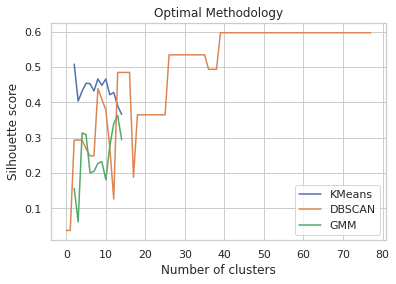

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

X = Transactions_norm[['median_price', 'median_margin', 'count']]

# Define range of cluster numbers to test
k_range = range(2, 15)
eps_range = np.arange(0.1, 1.0, 0.1)
min_samples_range = range(2, 15)
gmm_range = range(2, 15)

# Initialize lists to store silhouette scores
k_scores = []
dbscan_scores = []
gmm_scores = []

# Test KMeans clustering
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    k_scores.append(score)

print(k_scores)

# Test DBSCAN clustering
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        if len(np.unique(labels)) > 1:
            score = silhouette_score(X, labels)
            dbscan_scores.append(score)

print(dbscan_scores)

# Test GMM clustering
for k in gmm_range:
    gmm = GaussianMixture(n_components=k)
    labels = gmm.fit_predict(X)
    score = silhouette_score(X, labels)
    gmm_scores.append(score)

print(gmm_scores)

# Plot results
plt.plot(k_range, k_scores, label='KMeans')
plt.plot(dbscan_scores, label='DBSCAN')
plt.plot(gmm_range, gmm_scores, label='GMM')
plt.title('Optimal Methodology')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.legend()
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

[11.749929335503197, 5.29329964798444, 4.068671033738379, 3.1013522874587935, 2.391904541377891, 1.8463552908243661, 1.395577919506935, 1.0775873251069816, 0.8574192581527763, 0.6694996002860979, 0.5988404185878049, 0.5468475821107849, 0.47490048243609284, 0.41042282540962227, 0.38619852458913295, 0.3465209828188909, 0.314098551367414, 0.3053438336390699, 0.2752325484893263]


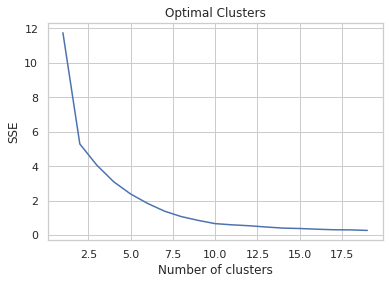

In [ ]:
X = Transactions_norm[['median_price', 'median_margin', 'count']]

# Define a range of number of clusters to test
k_range = range(1, 20)

# Compute the within-cluster sum of squared errors for each k
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

print(sse)

# Plot the SSE for each k
plt.plot(k_range, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Optimal Clusters')
plt.show()

In [ ]:
X = Transactions_norm[['median_price', 'median_margin', 'count']]

kmeans = KMeans(n_clusters=10, random_state=42).fit(X)

Transactions_norm['cluster'] = kmeans.labels_

Transactions_norm.sort_values(by = ['cluster'])

Transactions_norm.sort_values(by=['cluster'], inplace=True ,ascending=True)

Transactions_norm

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,median_price,median_margin,count,cluster
product_id,,,,
16,0.761115,0.000107,0.245675,0
39,0.844996,0.021021,0.301038,0
42,0.843466,0.000107,0.301038,0
44,0.821021,0.159419,0.252595,0
48,0.817306,0.007796,0.335640,0
...,...,...,...,...
21,0.542576,0.024318,0.128028,9
58,0.446613,0.030343,0.108997,9
59,0.525519,0.001808,0.122837,9


In [ ]:
full_transact_data = pd.merge(full_transact_data, Transactions_norm, on = "product_id", how="left")

In [ ]:
full_transact_data = full_transact_data.iloc[:, list(range(10)) + [-1]]

full_transact_data.columns = ['product_id', 'brand', 'bike_type', 'product_line', 'product_type', 'mean_price', 'median_price', 'mean_margin', 'median_margin', 'count', 'cluster']

full_transact_data

,product_id,brand,bike_type,product_line,product_type,mean_price,median_price,mean_margin,median_margin,count,cluster
0,0,Giant Bicycles,Manual Bikes,Standard,Accessory,382.496190,230.91,0.218978,0.333353,105,1
1,0,Norco Bicycles,Manual Bikes,Road,Accessory,543.720000,543.72,0.388529,0.388529,114,1
2,0,Norco Bicycles,Manual Bikes,Standard,Accessory,361.653622,360.40,0.293303,0.333333,127,1
3,0,OHM Cycles,Electric Bikes,Road,Accessory,26.334118,12.01,0.654896,0.665742,51,1
4,0,OHM Cycles,Electric Bikes,Standard,Accessory,186.032618,227.88,0.546030,0.666642,191,1
...,...,...,...,...,...,...,...,...,...,...,...
172,98,Trek Bicycles,Manual Bikes,Standard,Accessory,358.390000,358.39,0.666698,0.666698,110,1
173,99,OHM Cycles,Electric Bikes,Standard,Mid Priced Bike,1227.340000,1227.34,0.592108,0.592108,104,2
174,99,Trek Bicycles,Manual Bikes,Road,Mid Priced Bike,1720.700000,1720.70,0.123598,0.123598,48,2
175,100,Norco Bicycles,Manual Bikes,Road,Mid Priced Bike,1036.590000,1036.59,4.023455,4.023455,88,9


In [ ]:
product_segment = full_transact_data.groupby(['cluster']).agg({'mean_price':['median'],'median_price':['median'], 'mean_margin':['median'], 'median_margin':['median'], 'count':['sum','median','count']})

product_segment

mean_price median_price mean_margin median_margin count             
              median       median      median        median   sum median count
cluster                                                                       
0        1810.000000     1810.000    1.169072      1.169072  3700  148.0    25
1         372.753095      361.705    0.333365      0.333353  3988  106.5    40
2        1703.520000     1703.520    0.854987      0.854987  3406  104.0    35
3        1430.069333     1292.840   70.160836     95.193452   195  195.0     1
4         877.040000      877.040    0.503519      0.503519  3474   89.0    36
5         714.670640      571.115    1.624544      1.320668   791  195.0     4
6        2091.470000     2091.470    4.377636      4.377636   354  354.0     1
7        1292.840000     1292.840   35.611496     35.611496   345  146.0     3
8        1305.150849     1181.175    1.688267      1.519172   775  192.0     4
9        1229.640000     1229.640    0.720157      0.720157  2775  104.0    28

Segment the clusters to a quadrant

- Q1 = High Profits/Sales; Low QTY [clusters - 0, 2] --- increase mktg and sales support
- Q2 = High Profits/Sales; High QTY [clusters - 3, 5, 6, 7, 8] --- cash cows
- Q3 = Low Profits/Sales; Low QTY [clusters - 1, 4] --- need to assess (support urgently needed)
- Q4 = Low Profits/Sales; High QTY[clusters - 9] --- secondary cash cows

In [ ]:
# Show Cluster code

cluster_show = 4

prod_cluster = full_transact_data.loc[full_transact_data["cluster"] == cluster_show]

prod_cluster

,product_id,brand,bike_type,product_line,product_type,mean_price,median_price,mean_margin,median_margin,count,cluster
17,5,Giant Bicycles,Manual Bikes,Standard,Low Priced Bike,1129.13,1129.13,0.666662,0.666662,52,4
18,5,Trek Bicycles,Manual Bikes,Mountain,Low Priced Bike,574.64,574.64,0.250005,0.250005,170,4
24,9,Norco Bicycles,Manual Bikes,Standard,Low Priced Bike,1216.14,1216.14,0.123600,0.123600,56,4
25,9,OHM Cycles,Electric Bikes,Road,Low Priced Bike,742.54,742.54,0.112586,0.112586,145,4
40,18,Norco Bicycles,Manual Bikes,Standard,Low Priced Bike,1148.64,1148.64,0.666676,0.666676,48,4
41,18,Solex,Electric Bikes,Standard,Low Priced Bike,575.27,575.27,0.333341,0.333341,132,4
49,23,Norco Bicycles,Manual Bikes,Mountain,Low Priced Bike,688.63,688.63,0.123597,0.123597,145,4
50,23,Norco Bicycles,Manual Bikes,Standard,Low Priced Bike,1198.46,1198.46,2.144739,2.144739,52,4
58,29,Norco Bicycles,Manual Bikes,Road,Low Priced Bike,543.39,543.39,0.333342,0.333342,129,4
59,29,WeareA2B,Electric Bikes,Standard,Low Priced Bike,1065.03,1065.03,3.628754,3.628754,51,4


#Recommender System

## Data To Be Used

### Full Customer - Product - Transaction Data

In [ ]:
full_prod_cust_trans = Transact_Full.drop(['transaction_id','online_order', 'order_status','list_price', 'standard_cost',
                                            'Profit', 'Margin', 'Number of Unique Brands Bought',
                                             'cluster_list_price', 'ave_list_price', 'count'], axis = 1 )

full_prod_cust_trans = full_prod_cust_trans.merge(full_transact_data, how = 'left', on = ['product_id','brand', 'bike_type', 'product_line', 'product_type'])

full_prod_cust_trans = full_prod_cust_trans.drop(['mean_price', 'median_price', 'mean_margin', 'median_margin', 'count'], axis = 1)

full_prod_cust_trans['product'] = full_prod_cust_trans['product_id'].astype(str) + "-" + full_prod_cust_trans[['brand',
                                                                                                               'bike_type',
                                                                                                               'product_type',
                                                                                                               'product_line',
                                                                                                               'product_size']].agg('-'.join, axis=1)

full_prod_cust_trans.head()
customer_transactions = full_prod_cust_trans[['customer_id', 'transaction_date', 'product', 'cluster']].rename(columns = {"cluster": "prod_cluster"})

customer_transactions = customer_transactions.merge(data_rfm, on = 'customer_id', how = 'left').drop(['recency',
                                                                                                     'frequency',
                                                                                                     'monetary_value'],
                                                                                                     axis = 1).rename(columns = {"cluster": "rfm_cluster"})

customer_transactions.head()

,customer_id,transaction_date,product,prod_cluster,rfm_cluster
0,1,2017-12-23,86-OHM Cycles-Electric Bikes-Accessory-Standar...,1,4
1,1,2017-04-06,38-Solex-Electric Bikes-High Priced Bike-Stand...,0,4
2,1,2017-05-11,47-Trek Bicycles-Manual Bikes-High Priced Bike...,2,4
3,1,2017-01-05,72-Norco Bicycles-Manual Bikes-Accessory-Stand...,1,4
4,1,2017-02-21,2-Solex-Electric Bikes-Accessory-Standard-medium,1,4


### Customer Demographic Data

In [ ]:
Full_Transaction_Demo.columns

existing_customers = Full_Transaction_Demo[['customer_id', 'first_name', 'last_name', 'gender', 'past_3_years_bike_related_purchases',
                                            '2017_bike_related_purchases', 'last_transaction_date', 'DOB', 'Age', 'Age Group', 'job_industry_category',
                                            'wealth_segment', 'owns_car', 'tenure','Number of Unique Brands Bought_y', 'address', 'postcode', 'state',
                                            'country', 'past_purchase_range']]

existing_customers = existing_customers.drop_duplicates()
existing_customers = existing_customers.dropna(thresh = 19)

#existing_customers['tenure'].describe() # 0-5, 6-10, 11-15, 15+

bin_interval = [0, 5, 10, 15, 22]
bin_labels   = ['0-5', '6-10', '11-15', '15+']
existing_customers['Tenure Range'] = pd.cut(existing_customers['tenure'], bins = bin_interval, labels=bin_labels)

existing_customers.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,2017_bike_related_purchases,last_transaction_date,DOB,Age,Age Group,...,wealth_segment,owns_car,tenure,Number of Unique Brands Bought_y,address,postcode,state,country,past_purchase_range,Tenure Range
0,1,Laraine,Medendorp,Female,93.0,11.0,2017-12-23,1953-10-12,70.0,Senior,...,Mass Customer,Yes,11.0,5.0,060 Morning Avenue,2016.0,NSW,Australia,More than 60,11-15
11,2,Eli,Bockman,Male,81.0,3.0,2017-08-24,1980-12-16,43.0,Adult,...,Mass Customer,Yes,16.0,2.0,6 Meadow Vale Court,2153.0,NSW,Australia,More than 60,15+
22,4,Talbot,NaN,Male,33.0,2.0,2017-06-18,1961-10-03,62.0,Senior,...,Mass Customer,No,7.0,2.0,0 Holy Cross Court,4211.0,QLD,Australia,21-40,6-10
24,5,Sheila-kathryn,Calton,Female,56.0,6.0,2017-12-14,1977-05-13,46.0,Adult,...,Affluent Customer,Yes,8.0,5.0,17979 Del Mar Point,2448.0,NSW,Australia,41-60,6-10
30,6,Curr,Duckhouse,Male,35.0,5.0,2017-10-27,1966-09-16,57.0,Adult,...,High Net Worth,Yes,13.0,3.0,9 Oakridge Court,3216.0,VIC,Australia,21-40,11-15


## Recommender for New Customers

New customers might be new to the bike-related world. Without prior transactions, we can use demographics to recommend products.

### Demographic Clustering (Customers with Existing Transactions)

Getting the variables

We focus on purely demographic variables since our new customers have no transaction related data yet.

In [ ]:
clustering_vars = existing_customers[['customer_id', 'gender','Age Group', 'job_industry_category', 'wealth_segment', 'owns_car', 'Tenure Range', 'state']]

clustering_vars = clustering_vars.set_index('customer_id')

clustering_vars.head(5)

,gender,Age Group,job_industry_category,wealth_segment,owns_car,Tenure Range,state
customer_id,,,,,,,
1,Female,Senior,Health,Mass Customer,Yes,11-15,NSW
2,Male,Adult,Financial Services,Mass Customer,Yes,15+,NSW
4,Male,Senior,IT,Mass Customer,No,6-10,QLD
5,Female,Adult,NaN,Affluent Customer,Yes,6-10,NSW
6,Male,Adult,Retail,High Net Worth,Yes,11-15,VIC


In [ ]:
# Label Encode categorical variables
le = LabelEncoder()

for var in list(clustering_vars.columns):
  clustering_vars[var] = le.fit_transform(clustering_vars[var])

# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit KMeans
kmeans.fit(clustering_vars)

# Get cluster assignments
labels = kmeans.predict(clustering_vars)

clustering_vars['kmeans_cluster'] = labels

#for var in list(clustering_vars.columns):
#  if var != "labels":
#    clustering_vars[var] = le.inverse_transform(clustering_vars[var])

clustering_vars.head(5)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,gender,Age Group,job_industry_category,wealth_segment,owns_car,Tenure Range,state,kmeans_cluster
customer_id,,,,,,,,
1,0,1,3,2,1,1,0,1
2,1,0,2,2,1,2,0,3
4,1,1,4,2,0,3,1,2
5,0,0,9,0,1,3,0,0
6,1,0,7,1,1,1,2,4


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

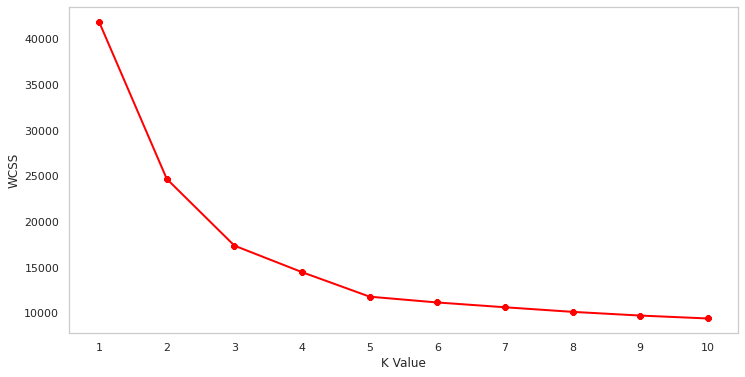

In [ ]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(clustering_vars)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

<Axes: >

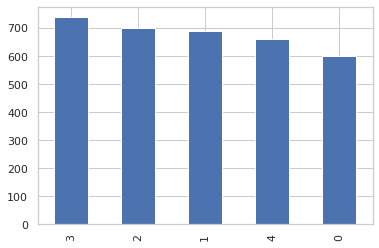

In [ ]:
clustering_vars = clustering_vars.reset_index()
customer_kmeans_cluster = clustering_vars[['customer_id','kmeans_cluster']]

customer_kmeans_cluster.head()

customer_transactions = customer_transactions.merge(customer_kmeans_cluster,
                                                    on = 'customer_id',
                                                    how = 'left').rename(columns = {"kmeans_cluster": "demo_cluster"})

customer_kmeans_cluster['kmeans_cluster'].value_counts().plot(kind = 'bar')

### Building the Predictive Model

In [ ]:
predicting_vars = existing_customers[['customer_id', 'gender','Age Group', 'job_industry_category', 'wealth_segment', 'owns_car', 'Tenure Range', 'state']]

predicting_vars = predicting_vars.merge(customer_kmeans_cluster, on = 'customer_id', how = 'left')

predicting_vars = predicting_vars.set_index('customer_id')

predicting_vars.head(5)

,gender,Age Group,job_industry_category,wealth_segment,owns_car,Tenure Range,state,kmeans_cluster
customer_id,,,,,,,,
1,Female,Senior,Health,Mass Customer,Yes,11-15,NSW,1
2,Male,Adult,Financial Services,Mass Customer,Yes,15+,NSW,3
4,Male,Senior,IT,Mass Customer,No,6-10,QLD,2
5,Female,Adult,NaN,Affluent Customer,Yes,6-10,NSW,0
6,Male,Adult,Retail,High Net Worth,Yes,11-15,VIC,4


In [ ]:
predicting_vars_dummies = pd.get_dummies(predicting_vars)
# Drop redundant columns/Avoid the dummy trap!
predicting_vars_dummies = predicting_vars_dummies.drop(['owns_car_No','Age Group_Young Adult','wealth_segment_Affluent Customer','Tenure Range_15+'], axis = 1)
predicting_vars_dummies.head(5)

,kmeans_cluster,gender_Female,gender_Male,Age Group_Adult,Age Group_Senior,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,...,job_industry_category_Telecommunications,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,Tenure Range_0-5,Tenure Range_6-10,Tenure Range_11-15,state_NSW,state_QLD,state_VIC
customer_id,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,1,0,0,0,1,0,...,0,0,1,1,0,0,1,1,0,0
2,3,0,1,1,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,2,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
6,4,0,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1


Using SVM:

In [ ]:
feat = predicting_vars_dummies.drop(columns=['kmeans_cluster'], axis = 1)
label = predicting_vars_dummies['kmeans_cluster']

X_train, X_test, y_train, y_test = train_test_split(feat, label, test_size=0.3)

support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(X_train, y_train)
y_pred_svc = support_vector_classifier.predict(X_test)

cm_support_vector_classifier = confusion_matrix(y_test,  y_pred_svc)
print(cm_support_vector_classifier,end='\n\n')
print("Accuracy: {} \n Precision: {} \n Recall: {} \n F1: {}".format(accuracy_score(y_test, y_pred_svc),
                                                                     precision_score(y_test, y_pred_svc, pos_label='positive', average='weighted'),
                                                                     recall_score(y_test, y_pred_svc,  pos_label='positive', average='weighted'),
                                                                     f1_score(y_test, y_pred_svc,  pos_label='positive', average='weighted')))

[[175   0   0   0   0]
 [  0 213   0   0   0]
 [  0   0 204   0   0]
 [  0   0   0 226   0]
 [  0   0   0   0 199]]

Accuracy: 1.0 
 Precision: 1.0 
 Recall: 1.0 
 F1: 1.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.



### Predicting Cluster for New Customers



In [ ]:
new_customers = Customer_New[['first_name', 'last_name', 'gender','Age Group', 'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'state']]


bin_interval = [0, 5, 10, 15, 22]
bin_labels   = ['0-5', '6-10', '11-15', '15+']
new_customers['Tenure Range'] = pd.cut(new_customers['tenure'], bins = bin_interval, labels = bin_labels)

new_customers = new_customers.drop('tenure', axis = 1)

new_customers.head(5)

<ipython-input-82-0f01f7e0796e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,first_name,last_name,gender,Age Group,job_industry_category,wealth_segment,owns_car,state,Tenure Range
0,Chickie,Brister,Male,Senior,Manufacturing,Mass Customer,Yes,QLD,11-15
1,Morly,Genery,Male,Adult,Property,Mass Customer,No,NSW,15+
2,Ardelis,Forrester,Female,Adult,Financial Services,Affluent Customer,No,VIC,6-10
3,Lucine,Stutt,Female,Adult,Manufacturing,Affluent Customer,Yes,QLD,0-5
4,Melinda,Hadlee,Female,Adult,Financial Services,Affluent Customer,No,NSW,15+


In [ ]:
new_customers_dummies = pd.get_dummies(new_customers.drop(['first_name','last_name'], axis = 1))

new_customers_dummies = new_customers_dummies.drop(['gender_Unknown','owns_car_No','Age Group_Young Adult',
                                                    'wealth_segment_Affluent Customer','Tenure Range_15+'], axis = 1)

new_customers_dummies['state_New South Wales'] = 0
new_customers_dummies['state_Victoria'] = 0

# TO DO: Find a way to automatically check if columns for predicting and new customers are the same and then add if missing.
## MEGA TO DO: Clean State for Customer and New Customer Table!!! (Ask Bryant)

# Sort the variables to be in the same order
new_customers_dummies = new_customers_dummies[predicting_vars_dummies.drop(['kmeans_cluster'], axis = 1).columns]
new_customers_dummies.head(5)

,gender_Female,gender_Male,Age Group_Adult,Age Group_Senior,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,...,job_industry_category_Telecommunications,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,Tenure Range_0-5,Tenure Range_6-10,Tenure Range_11-15,state_NSW,state_QLD,state_VIC
0,0,1,0,1,0,0,0,0,0,1,...,0,0,1,1,0,0,1,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
4,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
new_customer_predicted_clusters = support_vector_classifier.predict(new_customers_dummies)

new_customers['predicted_kmeans_cluster'] = list(new_customer_predicted_clusters)

new_customers.head(5)

,first_name,last_name,gender,Age Group,job_industry_category,wealth_segment,owns_car,state,Tenure Range,predicted_kmeans_cluster
0,Chickie,Brister,Male,Senior,Manufacturing,Mass Customer,Yes,QLD,11-15,4
1,Morly,Genery,Male,Adult,Property,Mass Customer,No,NSW,15+,2
2,Ardelis,Forrester,Female,Adult,Financial Services,Affluent Customer,No,VIC,6-10,3
3,Lucine,Stutt,Female,Adult,Manufacturing,Affluent Customer,Yes,QLD,0-5,4
4,Melinda,Hadlee,Female,Adult,Financial Services,Affluent Customer,No,NSW,15+,3


### Ranking Products By Cluster

In [ ]:
def recommend_to_new_customer_list(first_name, last_name):
  '''
  This function produces recommendations for customers that exist in the New Customer List dataset.
  '''
  # Get customer's predicted cluster
  customer = new_customers[(new_customers['first_name'] == first_name) & (new_customers['last_name'] == last_name)]
  customer_cluster = customer.iloc[0]['predicted_kmeans_cluster']

  # Get table of existing customers in the cluster
  cluster_customers = customer_kmeans_cluster[customer_kmeans_cluster['kmeans_cluster'] == customer_cluster]

  # Get table of transactions made by existing customers in the cluster
  cluster_transactions = customer_transactions[customer_transactions['customer_id'].isin(list(cluster_customers['customer_id']))]

  # Aggregate products by count
  cluster_products = cluster_transactions.groupby(['product'])['product'].count().reset_index(name = 'count')

  # Sort the table in descending order and return top 5 items
  recommended_products = list(cluster_products.sort_values(['count'], ascending = False).head(5)['product'])

  return recommended_products

print(recommend_to_new_customer_list("Morly", "Genery"))

['3-Trek Bicycles-Manual Bikes-High Priced Bike-Standard-large', '1-Giant Bicycles-Manual Bikes-Mid Priced Bike-Standard-medium', '36-Solex-Electric Bikes-Mid Priced Bike-Standard-medium', '0-OHM Cycles-Electric Bikes-Accessory-Standard-medium', '32-Giant Bicycles-Manual Bikes-Low Priced Bike-Standard-medium']


In [ ]:
def recommend_to_new_customer(first_name, last_name, gender, age_group, job_industry, wealth_segment, own_car, state, tenure_range):
  predict_df = pd.DataFrame({column : pd.Series(dtype='int') for column in  list(predicting_vars_dummies.drop(['kmeans_cluster'], axis = 1).columns)})
  # Input customer as single row dataframe
  customer_data = [[first_name, last_name, gender, age_group, job_industry, wealth_segment, own_car, tenure_range, state]]
  customer_df = pd.DataFrame(customer_data, columns = list(new_customers.drop(['predicted_kmeans_cluster'], axis = 1).columns))
  customer_df_dummies = pd.get_dummies(customer_df.drop(['first_name', 'last_name'], axis = 1))
  predict_df = predict_df.merge(customer_df_dummies, how = 'outer')
  predict_df = predict_df.fillna(0)
  predict_df = predict_df[predicting_vars_dummies.drop(['kmeans_cluster'], axis = 1).columns]
  # Use SVM model to predict cluster
  predicted_kmeans_cluster = support_vector_classifier.predict(predict_df)

  customer_cluster = list(support_vector_classifier.predict(predict_df))[0]

  # Get table of existing customers in the cluster
  cluster_customers = customer_kmeans_cluster[customer_kmeans_cluster['kmeans_cluster'] == customer_cluster]

  # Get table of transactions made by existing customers in the cluster
  cluster_transactions = customer_transactions[customer_transactions['customer_id'].isin(list(cluster_customers['customer_id']))]

  # Aggregate products by count
  cluster_products = cluster_transactions.groupby(['product'])['product'].count().reset_index(name = 'count')

  # Sort the table in descending order and return top 5 items
  recommended_products = list(cluster_products.sort_values(['count'], ascending = False).head(5)['product'])

  return recommended_products

print(recommend_to_new_customer("Johan", "Sundstein", "Male", "Adult", "Entertainment", "High Net Worth", "Yes", "0-5", "Victoria"))

['3-Trek Bicycles-Manual Bikes-High Priced Bike-Standard-large', '1-Giant Bicycles-Manual Bikes-Mid Priced Bike-Standard-medium', '4-Giant Bicycles-Manual Bikes-Mid Priced Bike-Standard-medium', '54-WeareA2B-Electric Bikes-Mid Priced Bike-Standard-medium', '36-Solex-Electric Bikes-Mid Priced Bike-Standard-medium']


## Recommender for Old Customers

### Product Cluster

In [ ]:
def get_clustered_products_recs(id, transactions):
  # Given customer, get table of all their transactions
  cust_transactions = transactions[transactions['customer_id'].isin([id])]

  # Get table of all products found in this cluster
  clusters = list(cust_transactions[cust_transactions['customer_id'].isin([id])]['prod_cluster'])

  products  = transactions[transactions['prod_cluster'].isin(clusters)].groupby(['product','prod_cluster'])['product'].count().reset_index(name = 'count')

  # Get which cluster has the most number of distinct products present in customer's transactions
  cluster_count = {cluster: len(products[products['prod_cluster'] == cluster].index) for cluster in clusters}

  if (len(set(cluster_count.values())) == 1) and (len(cluster_count.keys()) > 1): # If equal count per cluster, most recent item's cluster
    main_cluster = list(cust_transactions[cust_transactions['transaction_date'].isin([cust_transactions['transaction_date'].max()])]['prod_cluster'])[0]
  elif (len(cluster_count.keys()) == 0):
    main_cluster = None
  else:
    main_cluster = max(cluster_count, key = cluster_count.get)

  # Filter to products of main cluster
  products = products[products['prod_cluster'] == main_cluster]

  # Drop all products the customer has already bought
  products.drop(products[products['product'].isin(cust_transactions['product'])].index, inplace = True)

  products = products.sort_values(['count'], ascending = False)

  return products

get_clustered_products_recs(4, customer_transactions).head()

,product,prod_cluster,count
19,5-Trek Bicycles-Manual Bikes-Low Priced Bike-M...,4,170
21,53-OHM Cycles-Electric Bikes-Low Priced Bike-S...,4,162
17,49-Trek Bicycles-Manual Bikes-Low Priced Bike-...,4,160
27,69-Giant Bicycles-Manual Bikes-Low Priced Bike...,4,159
14,45-Solex-Electric Bikes-Low Priced Bike-Standa...,4,158


In [ ]:
test = {}
test.values()

dict_values([])

### Customer Cluster (Demographic and Behavior)

In [ ]:
def get_clustered_customer_recs(id, transactions):
  # Get RFM cluster of customer
  rfm_cluster = list(transactions[transactions['customer_id'].isin([id])]['rfm_cluster'])
  demo_cluster = list(transactions[transactions['customer_id'].isin([id])]['demo_cluster'])

  # Get transactions by all the customers in the cluster
  cluster_transactions = transactions[(transactions['rfm_cluster'].isin(rfm_cluster)) & (transactions['demo_cluster'].isin(demo_cluster))]

  # Aggregate products by count
  cluster_products = list(cluster_transactions.drop_duplicates(subset = 'product')['product'])
  recommended_products = transactions[transactions['product'].isin(cluster_products)].groupby(['product'])['product'].count().reset_index(name = 'count')

  #Sort the table in descending order and return top 5 items
  #recommended_products = cluster_products.sort_values(['count'], ascending = False).head(50)['product']

  # Remove any products already bought by the customer

  recommended_products.drop(recommended_products[recommended_products['product'].isin(transactions[transactions['customer_id'].isin([id])])].index, inplace = True)

  recommended_products = recommended_products.sort_values(['count'], ascending = False)

  return recommended_products

get_clustered_customer_recs(4, customer_transactions).head()

,product,count
9,1-Giant Bicycles-Manual Bikes-Mid Priced Bike-...,270
19,27-Trek Bicycles-Manual Bikes-Low Priced Bike-...,215
21,36-Solex-Electric Bikes-Mid Priced Bike-Standa...,211
5,0-Solex-Electric Bikes-Accessory-Standard-medium,206
17,2-Solex-Electric Bikes-Accessory-Standard-medium,194


In [ ]:
def recommend_to_old_customer(id, transactions):
  prod = get_clustered_products_recs(id, transactions)

  customer = get_clustered_customer_recs(id, transactions)

  recs = prod.merge(customer, on = 'product', how = 'inner')

  recommended_products = list(recs.sort_values(['count_x'],
                                               ascending = False)['product'])

  return recommended_products

recommend_to_old_customer(3, customer_transactions)

['2-Solex-Electric Bikes-Accessory-Standard-medium',
 '0-OHM Cycles-Electric Bikes-Accessory-Standard-medium',
 '6-OHM Cycles-Electric Bikes-Accessory-Standard-medium',
 '56-OHM Cycles-Electric Bikes-Accessory-Standard-medium',
 '0-Norco Bicycles-Manual Bikes-Accessory-Standard-medium',
 '98-Trek Bicycles-Manual Bikes-Accessory-Standard-medium',
 '19-Trek Bicycles-Manual Bikes-Accessory-Mountain-medium',
 '86-Norco Bicycles-Manual Bikes-Accessory-Road-large',
 '72-OHM Cycles-Electric Bikes-Accessory-Standard-medium']

#Customer Reactivation

## Generate Inactive Client Table

### Generating the Inactive Clients Table

In [ ]:
def generate_inactive_client(date, df):
  date = datetime.strptime(date, '%Y-%m-%d')
  # Create inactivity bins
  inactivity_bin_labels = ['LOW','MEDIUM','HIGH', 'VERY HIGH']
  inactivity_bins = [0, 30, 60, 90, 365]
  # Get last transaction given date
  transactions = df[df['transaction_date'] < date ]
  client_activity = transactions.groupby(['customer_id'])['transaction_date'].max().reset_index(name = 'last_transaction_date')
  # Get time delta from last transaction to date
  client_activity['days_since_last_transaction'] = (date - client_activity['last_transaction_date']).dt.days
  client_activity['months_since_last_transaction'] = client_activity['days_since_last_transaction'] // 30

  client_activity['priority'] = pd.cut(client_activity['days_since_last_transaction'], bins = inactivity_bins, labels = inactivity_bin_labels)

  # Get RFM cluster label
  clusters = [
    (df['rfm_cluster'] == 6),
    (df['rfm_cluster'] == 2) | (df['rfm_cluster'] == 3),
    (df['rfm_cluster'] == 4) | (df['rfm_cluster'] == 9),
    (df['rfm_cluster'] == 0) | (df['rfm_cluster'] ==  5) | (df['rfm_cluster'] == 8),
    (df['rfm_cluster'] == 1),
    (df['rfm_cluster'] == 7)
  ]

  segment = ['Champion', 'Potential Champion', 'Loyalist', "Can't Lose", 'Need Attention', 'Sleeping Soon']

  df['rfm_type'] = np.select(clusters, segment)

  client_activity = client_activity.merge(df[['customer_id', 'rfm_type']], on = 'customer_id', how = 'left').drop_duplicates()

  return client_activity
generate_inactive_client("2017-10-23", customer_transactions).head(10)

,customer_id,last_transaction_date,days_since_last_transaction,months_since_last_transaction,priority,rfm_type
0,1,2017-06-04,141,4,VERY HIGH,Loyalist
11,2,2017-08-24,60,2,MEDIUM,Can't Lose
14,3,2017-09-19,34,1,MEDIUM,Potential Champion
22,4,2017-06-18,127,4,VERY HIGH,Sleeping Soon
24,5,2017-08-16,68,2,HIGH,Can't Lose
30,6,2017-09-16,37,1,MEDIUM,Can't Lose
35,7,2017-04-21,185,6,VERY HIGH,Sleeping Soon
38,8,2017-10-21,2,0,LOW,Potential Champion
48,9,2017-10-13,10,0,LOW,Can't Lose
54,10,2017-08-26,58,1,MEDIUM,Can't Lose


## Reactivation Using Demographic-based Recommender

In [ ]:
def recs_per_demo_cluster():
  recs_list = []
  for cluster in range(5):
    cluster_customers = customer_kmeans_cluster[customer_kmeans_cluster['kmeans_cluster'] == cluster]
    # Get table of transactions made by existing customers in the cluster
    cluster_transactions = customer_transactions[customer_transactions['customer_id'].isin(list(cluster_customers['customer_id']))]
    # Aggregate products by count
    cluster_products = cluster_transactions.groupby(['product'])['product'].count().reset_index(name = 'count')
    # Sort the table in descending order and return top 5 items
    recommended_products = list(cluster_products.sort_values(['count'], ascending = False).head(5)['product'])
    recs_list.append(recommended_products)
  data = {'cluster': range(5), 'recommendations': recs_list}
  return pd.DataFrame(data = data)

recs_per_demo_cluster().head()

,cluster,recommendations
0,0,[3-Trek Bicycles-Manual Bikes-High Priced Bike...
1,1,[3-Trek Bicycles-Manual Bikes-High Priced Bike...
2,2,[3-Trek Bicycles-Manual Bikes-High Priced Bike...
3,3,[3-Trek Bicycles-Manual Bikes-High Priced Bike...
4,4,[3-Trek Bicycles-Manual Bikes-High Priced Bike...


In [ ]:
def generate_reactivate_client_demo(date, transactions, cluster_df, cluster_recs_df):
  inactive_df = generate_inactive_client(date, transactions)
  inactive_df = inactive_df.merge(cluster_df, on= 'customer_id', how = 'left')
  return inactive_df.merge(cluster_recs_df, left_on = 'kmeans_cluster', right_on = 'cluster', how = 'left')

generate_reactivate_client_demo("2017-10-23", customer_transactions,customer_kmeans_cluster, recs_per_demo_cluster()).head()

,customer_id,last_transaction_date,days_since_last_transaction,months_since_last_transaction,priority,rfm_type,kmeans_cluster,cluster,recommendations
0,1,2017-06-04,141,4,VERY HIGH,Loyalist,1.0,1.0,[3-Trek Bicycles-Manual Bikes-High Priced Bike...
1,2,2017-08-24,60,2,MEDIUM,Can't Lose,3.0,3.0,[3-Trek Bicycles-Manual Bikes-High Priced Bike...
2,3,2017-09-19,34,1,MEDIUM,Potential Champion,NaN,NaN,NaN
3,4,2017-06-18,127,4,VERY HIGH,Sleeping Soon,2.0,2.0,[3-Trek Bicycles-Manual Bikes-High Priced Bike...
4,5,2017-08-16,68,2,HIGH,Can't Lose,0.0,0.0,[3-Trek Bicycles-Manual Bikes-High Priced Bike...


## Reactivation Using Hybrid Recommender

In [ ]:
def generate_reactivate_client_hybrid(date, transactions):
  inactive_df = generate_inactive_client(date, transactions)
  recs = []
  for customer in list(inactive_df['customer_id']):
    recs.append(recommend_to_old_customer(customer,transactions)[:3])
  data = {
      'customer_id': list(inactive_df['customer_id']),
      'recommendations': recs
  }

  recs_df = pd.DataFrame(data)

  return inactive_df.merge(recs_df, on = 'customer_id', how = 'left')

generate_reactivate_client_hybrid("2017-12-28", customer_transactions).head(10)

<ipython-input-87-e01ab03659b9>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-e01ab03659b9>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-e01ab03659b9>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-e01ab03659b9>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

,customer_id,last_transaction_date,days_since_last_transaction,months_since_last_transaction,priority,rfm_type,recommendations
0,1,2017-12-23,5,0,LOW,Loyalist,[0-Solex-Electric Bikes-Accessory-Standard-med...
1,2,2017-08-24,126,4,VERY HIGH,Can't Lose,[57-WeareA2B-Electric Bikes-High Priced Bike-T...
2,3,2017-09-19,100,3,VERY HIGH,Potential Champion,[2-Solex-Electric Bikes-Accessory-Standard-med...
3,4,2017-06-18,193,6,VERY HIGH,Sleeping Soon,[5-Trek Bicycles-Manual Bikes-Low Priced Bike-...
4,5,2017-12-14,14,0,LOW,Can't Lose,[0-Solex-Electric Bikes-Accessory-Standard-med...
5,6,2017-10-27,62,2,HIGH,Can't Lose,[0-Solex-Electric Bikes-Accessory-Standard-med...
6,7,2017-04-21,251,8,VERY HIGH,Sleeping Soon,[0-Solex-Electric Bikes-Accessory-Standard-med...
7,8,2017-12-08,20,0,LOW,Potential Champion,[5-Trek Bicycles-Manual Bikes-Low Priced Bike-...
8,9,2017-10-13,76,2,HIGH,Can't Lose,[0-Solex-Electric Bikes-Accessory-Standard-med...
9,10,2017-11-17,41,1,MEDIUM,Can't Lose,[9-OHM Cycles-Electric Bikes-Low Priced Bike-R...


In [ ]:
generate_reactivate_client_hybrid("2017-12-31", customer_transactions).to_csv('/content/gdrive/MyDrive/ISS621 Project/generate_reactive_client_hybrid.csv')

<ipython-input-87-e01ab03659b9>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-e01ab03659b9>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-e01ab03659b9>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def generate_reactivate_client_hybrid_promo(date, transactions):
  prod_cluster_help = [0, 5, 9]
  inactive_df = generate_inactive_client(date, transactions)
  popular_recs = []
  promo_recs = []

  for customer in list(inactive_df['customer_id']):
    recs_list = recommend_to_old_customer(customer,transactions)
    # Recommended product based on popularity (most number of transactions)
    popular_recs.append(recs_list[0] if recs_list else "3-Trek Bicycles-Manual Bikes-High Priced Bike-Standard-large")

    # Recommended product within cluster that needs promotion
    promo_products = list(transactions[transactions['prod_cluster'].isin(prod_cluster_help)]['product'])
    promo_product = set(recs_list).intersection(promo_products)

    promo_recs.append(list(promo_product)[0] if len(promo_product) != 0 else "1-Giant Bicycles-Manual Bikes-Mid Priced Bike-Standard-medium")

  data = {
      'customer_id': list(inactive_df['customer_id']),
      'popular_rec': popular_recs,
      'promo_rec': promo_recs
  }

  recs_df = pd.DataFrame(data)

  return inactive_df.merge(recs_df, on = 'customer_id', how = 'left')

generate_reactivate_client_hybrid_promo("2017-12-31", customer_transactions).head(10)

<ipython-input-87-e01ab03659b9>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-e01ab03659b9>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-e01ab03659b9>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_id,last_transaction_date,days_since_last_transaction,months_since_last_transaction,priority,rfm_type,popular_rec,promo_rec
0,1,2017-12-23,8,0,LOW,Loyalist,0-Solex-Electric Bikes-Accessory-Standard-medium,1-Giant Bicycles-Manual Bikes-Mid Priced Bike-...
1,2,2017-08-24,129,4,VERY HIGH,Can't Lose,57-WeareA2B-Electric Bikes-High Priced Bike-To...,16-Norco Bicycles-Manual Bikes-High Priced Bik...
2,3,2017-09-19,103,3,VERY HIGH,Potential Champion,2-Solex-Electric Bikes-Accessory-Standard-medium,1-Giant Bicycles-Manual Bikes-Mid Priced Bike-...
3,4,2017-06-18,196,6,VERY HIGH,Sleeping Soon,5-Trek Bicycles-Manual Bikes-Low Priced Bike-M...,1-Giant Bicycles-Manual Bikes-Mid Priced Bike-...
4,5,2017-12-14,17,0,LOW,Can't Lose,0-Solex-Electric Bikes-Accessory-Standard-medium,1-Giant Bicycles-Manual Bikes-Mid Priced Bike-...
5,6,2017-10-27,65,2,HIGH,Can't Lose,0-Solex-Electric Bikes-Accessory-Standard-medium,1-Giant Bicycles-Manual Bikes-Mid Priced Bike-...
6,7,2017-04-21,254,8,VERY HIGH,Sleeping Soon,0-Solex-Electric Bikes-Accessory-Standard-medium,1-Giant Bicycles-Manual Bikes-Mid Priced Bike-...
7,8,2017-12-08,23,0,LOW,Potential Champion,5-Trek Bicycles-Manual Bikes-Low Priced Bike-M...,1-Giant Bicycles-Manual Bikes-Mid Priced Bike-...
8,9,2017-10-13,79,2,HIGH,Can't Lose,0-Solex-Electric Bikes-Accessory-Standard-medium,1-Giant Bicycles-Manual Bikes-Mid Priced Bike-...
9,10,2017-11-17,44,1,MEDIUM,Can't Lose,9-OHM Cycles-Electric Bikes-Low Priced Bike-Ro...,1-Giant Bicycles-Manual Bikes-Mid Priced Bike-...


In [ ]:
generate_reactivate_client_hybrid_promo("2017-12-31", customer_transactions).to_csv('/content/gdrive/MyDrive/ISS621 Project/generate_reactivate_client_hybrid_promo.csv')

<ipython-input-87-e01ab03659b9>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-e01ab03659b9>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-e01ab03659b9>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-e01ab03659b9>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/